In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:42617")
client

<Client: 'tcp://127.0.0.1:42617' processes=8 threads=32, memory=125.87 GiB>

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import os.path as op
import os
import xrft
import xwavelet
from scipy.interpolate import griddata
from xgcm.grid import Grid
from xmitgcm import open_mdsdataset
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/tank/chaocean/qjamet/RUNS/ORAR/reruns2/'
gdir = '/tank/chaocean/grid_chaO/gridMIT_update1/'
spec = '/tank/spectre/tuchida/NA-wavelets/'

In [4]:
grav = 9.81
nensembs = 5
Kh = 20.
K4 = 1e10
Kr = 1e-5
thetaMax = 1e20
rhoConst = 9.998e2
Cp = 3.994e3
ySstart = -19.8
yNstart = 10
yend = 50

tchunk = 1
xchunk = 200
ychunk = 200

ntheta = 36
xo = 50e3

In [5]:
dnf = 2160
nfile = 73
years = np.arange(1963,2013,dtype=int)
ntimes = (np.arange(790560,8672400+dnf,dnf).reshape(len(years),nfile) 
          - dnf)
dd = 0
yystart = 4
ntimes[yystart,dd:]

array([1419120, 1421280, 1423440, 1425600, 1427760, 1429920, 1432080,
       1434240, 1436400, 1438560, 1440720, 1442880, 1445040, 1447200,
       1449360, 1451520, 1453680, 1455840, 1458000, 1460160, 1462320,
       1464480, 1466640, 1468800, 1470960, 1473120, 1475280, 1477440,
       1479600, 1481760, 1483920, 1486080, 1488240, 1490400, 1492560,
       1494720, 1496880, 1499040, 1501200, 1503360, 1505520, 1507680,
       1509840, 1512000, 1514160, 1516320, 1518480, 1520640, 1522800,
       1524960, 1527120, 1529280, 1531440, 1533600, 1535760, 1537920,
       1540080, 1542240, 1544400, 1546560, 1548720, 1550880, 1553040,
       1555200, 1557360, 1559520, 1561680, 1563840, 1566000, 1568160,
       1570320, 1572480, 1574640])

In [6]:
critt = .7

# KE power spectra

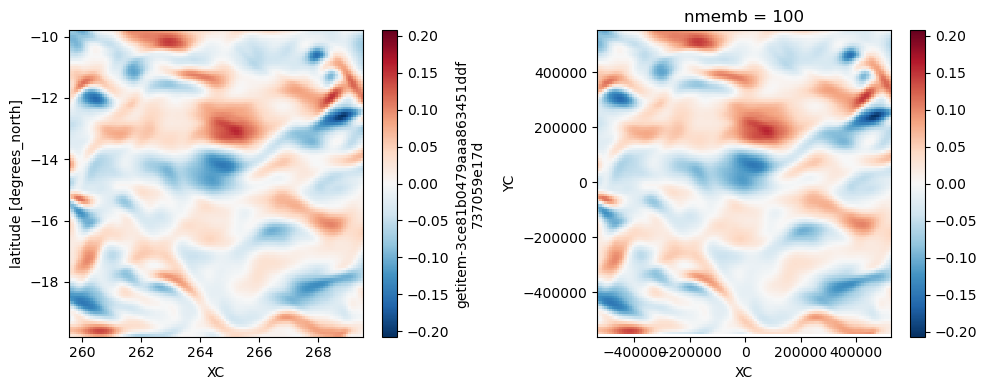

GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!


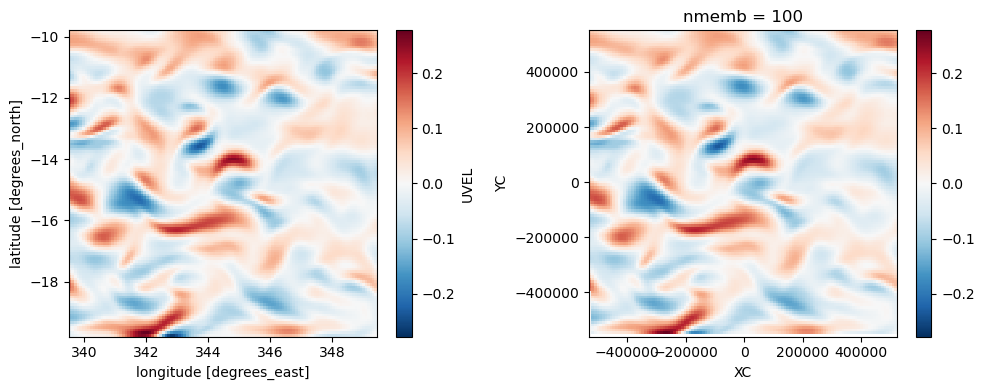

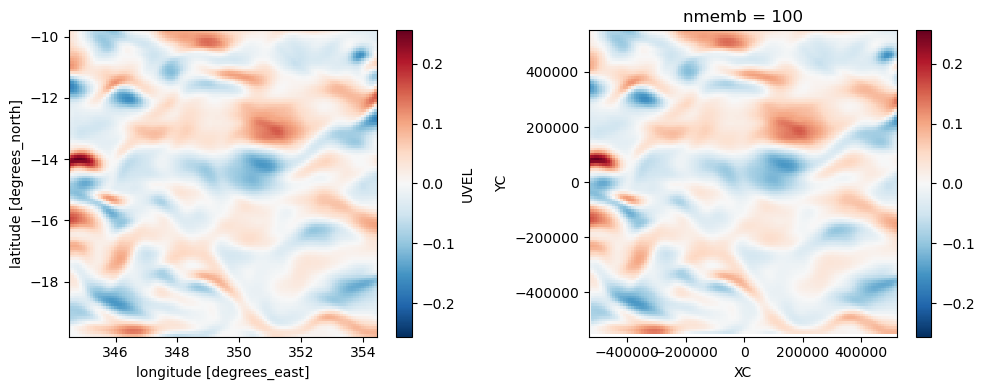

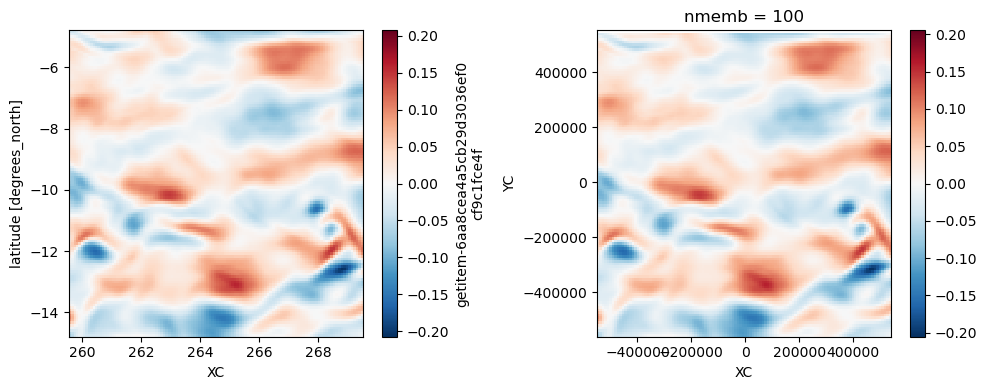

GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!


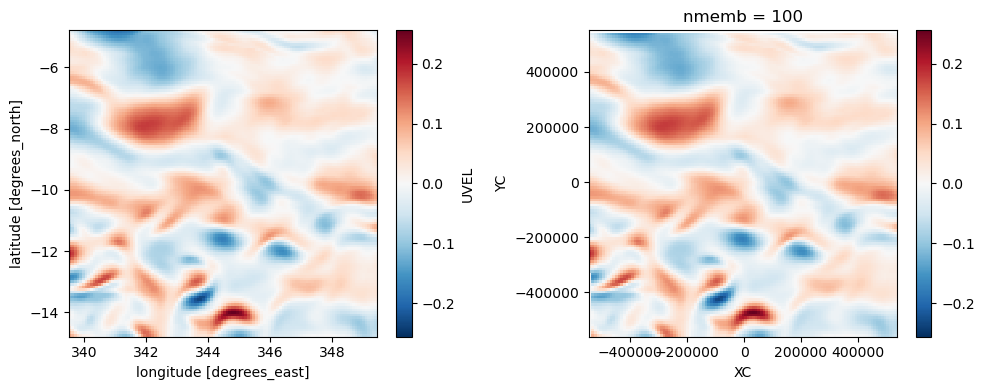

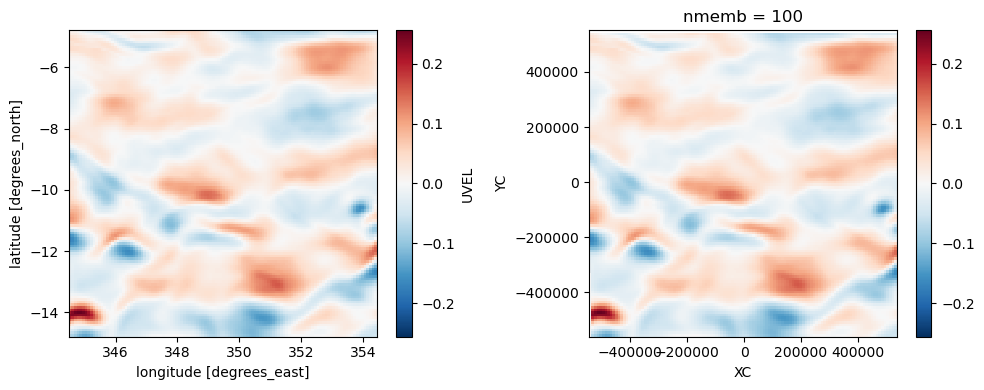

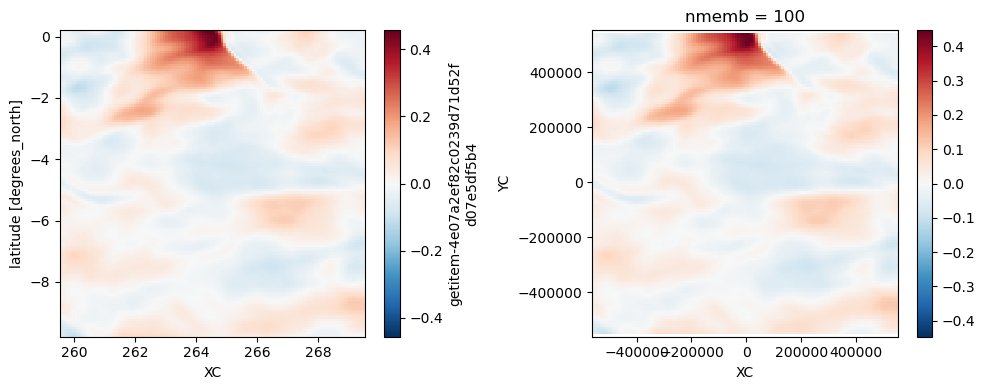

GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!


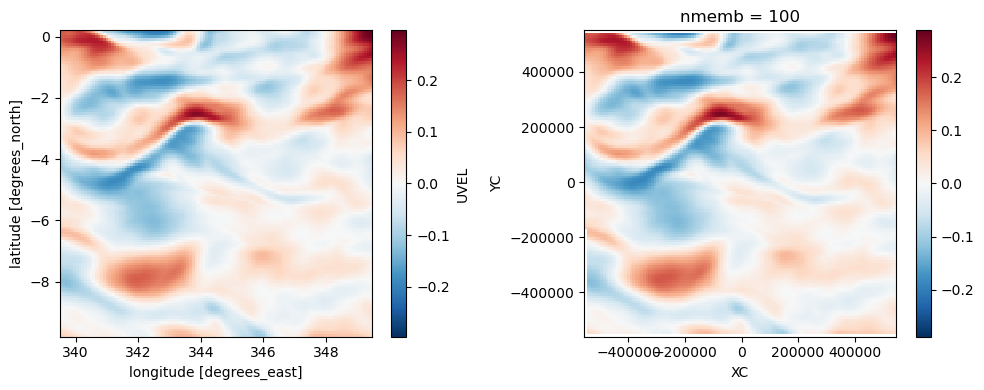

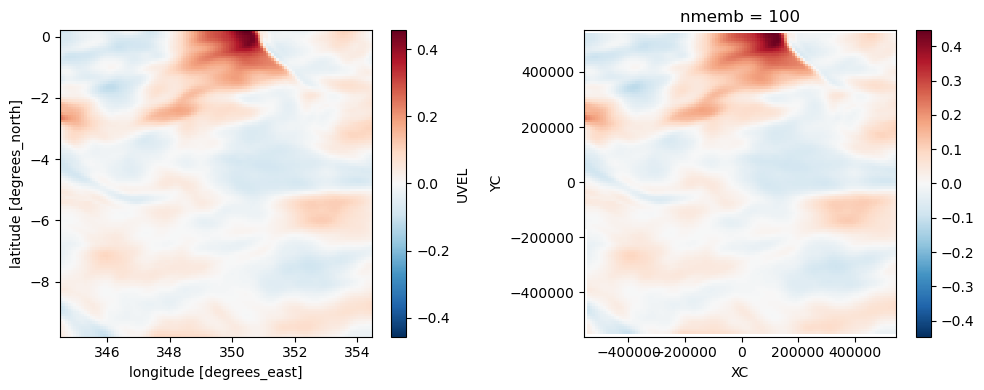

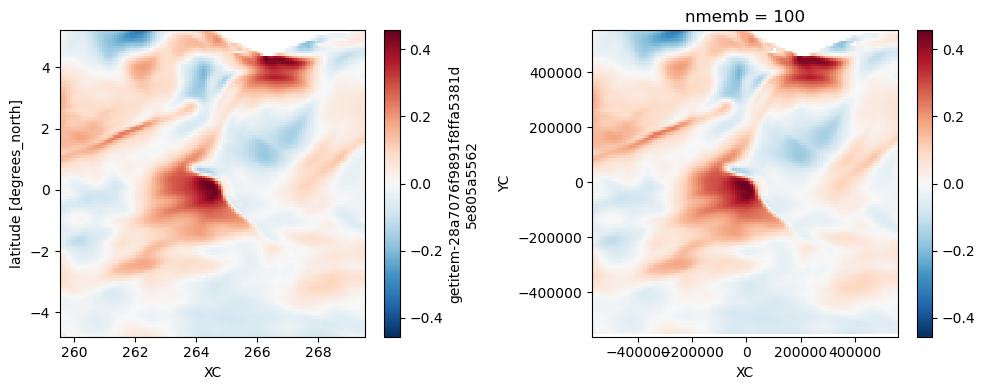

GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!


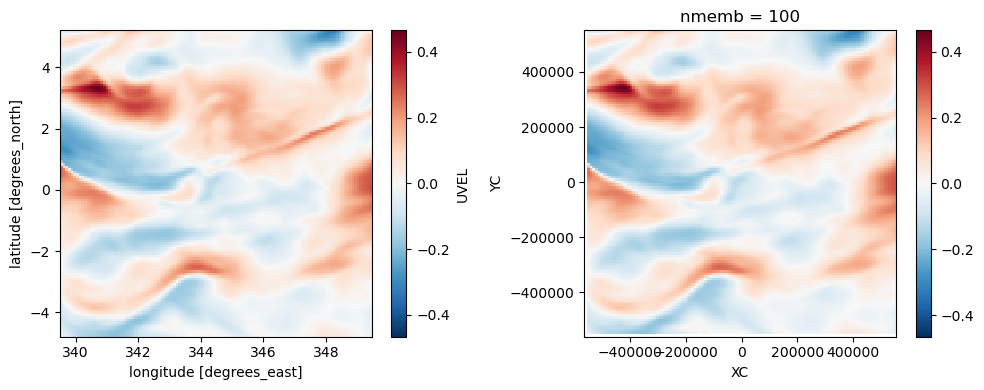

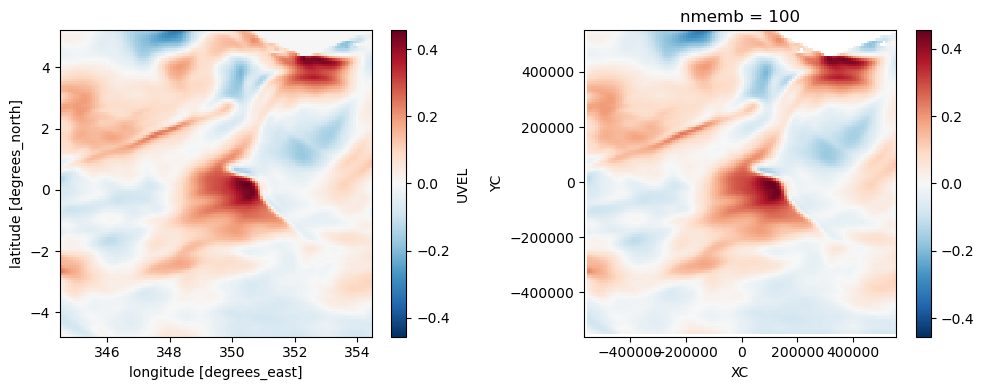

GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!


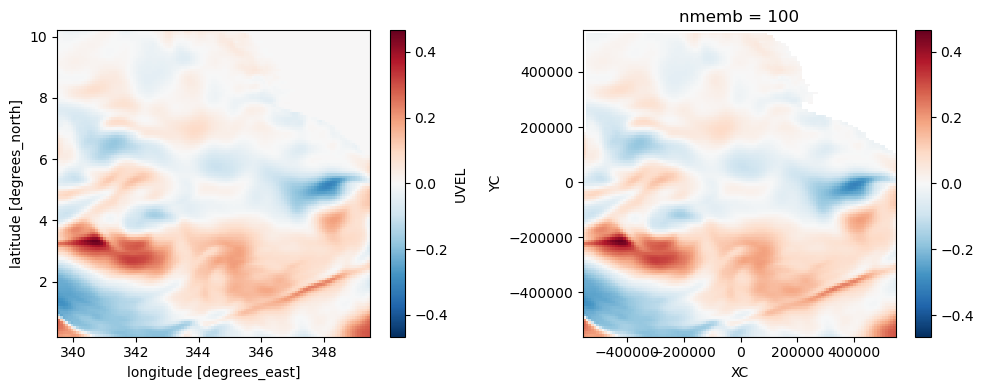

GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!


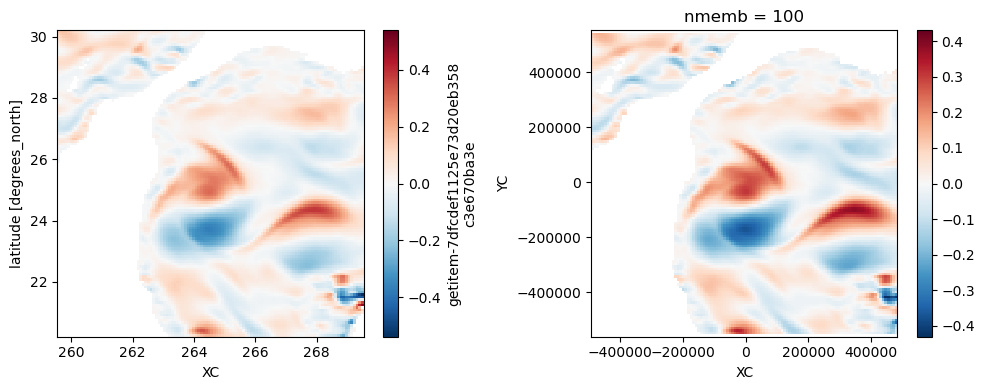

GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!


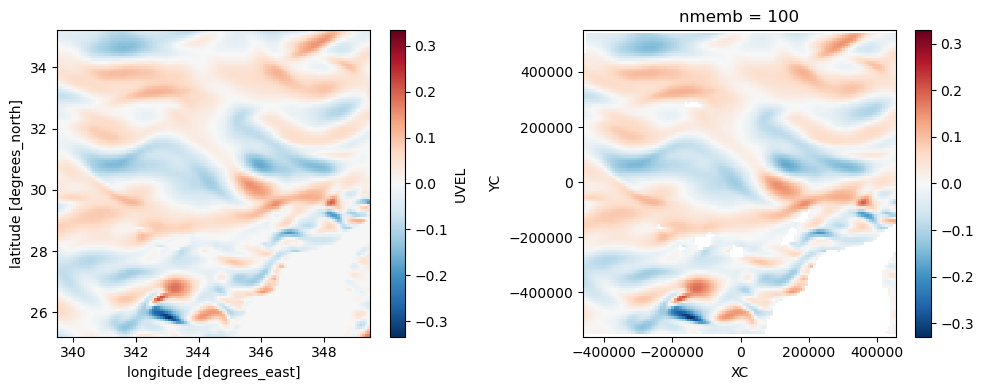

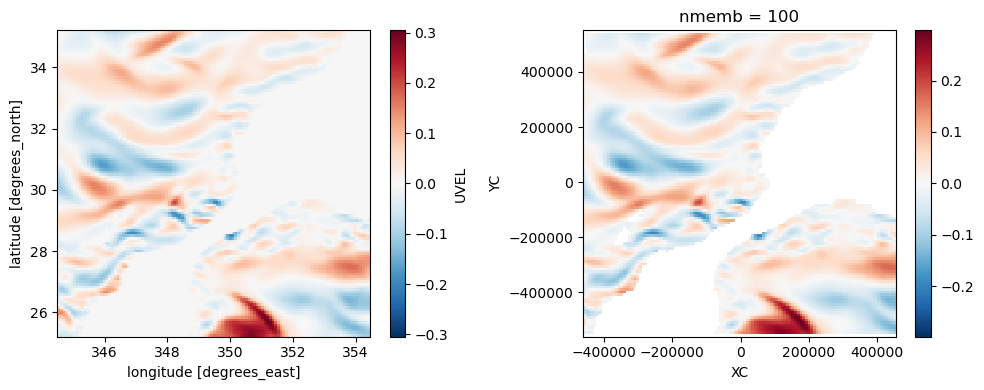

GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!


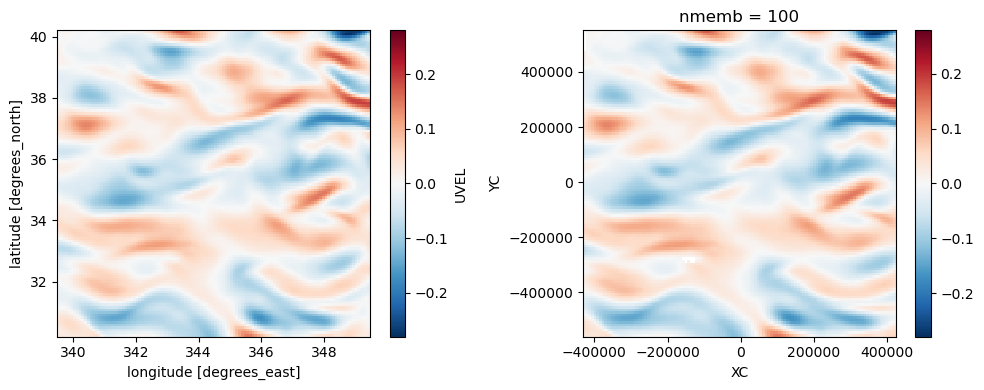

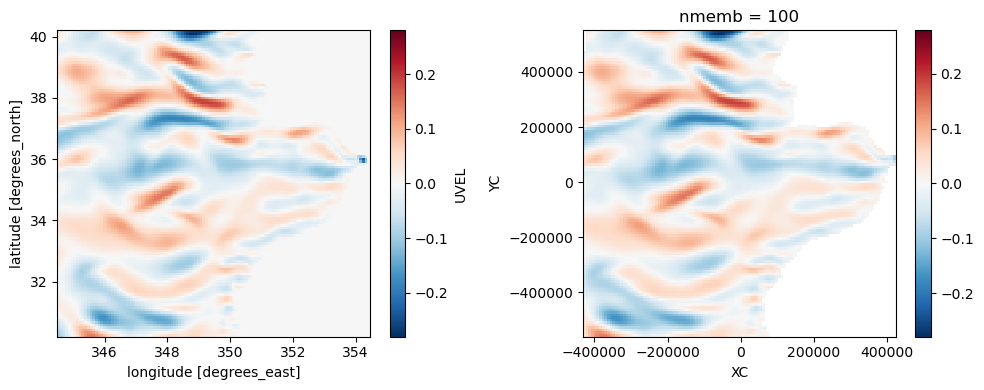

GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!


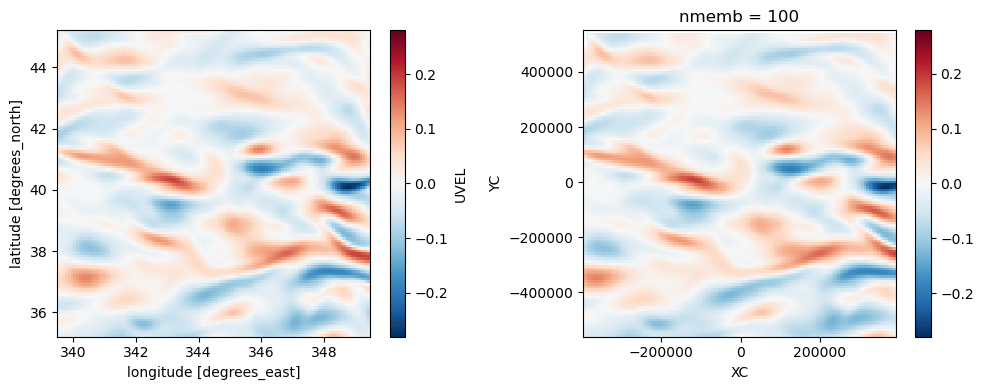

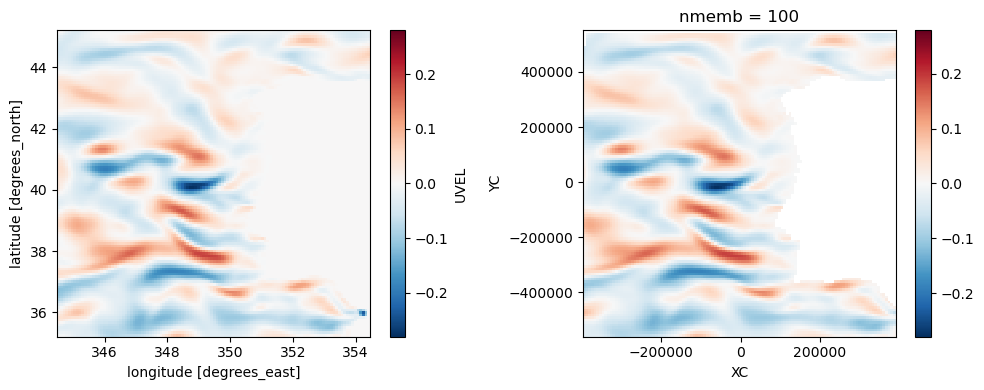

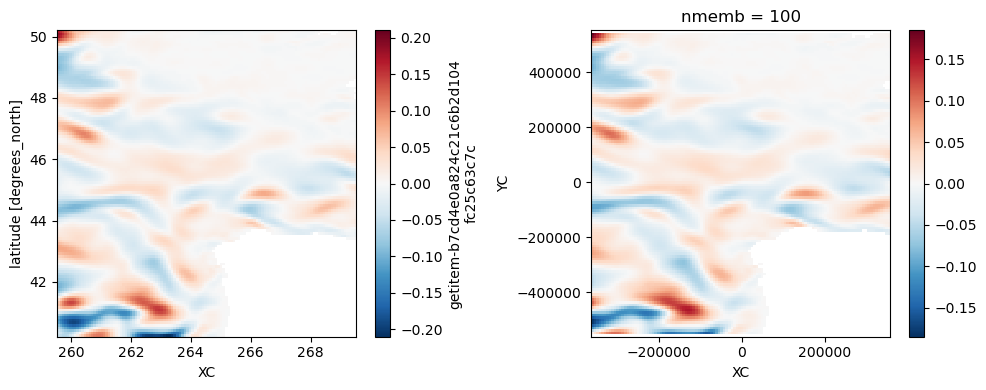

GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!


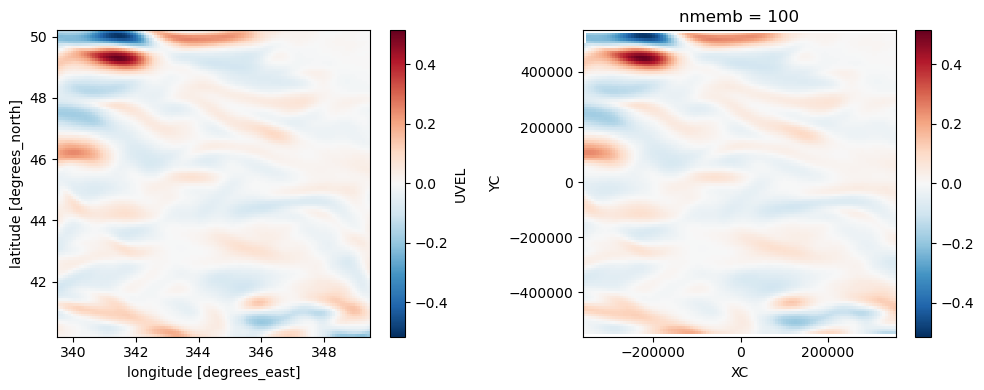

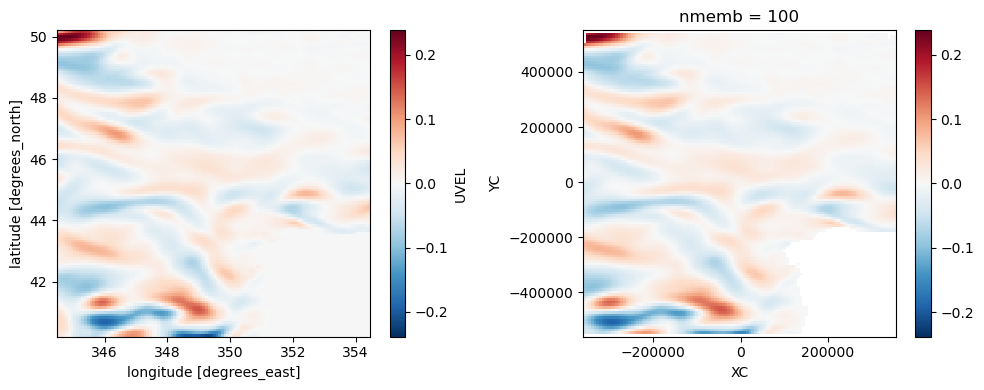

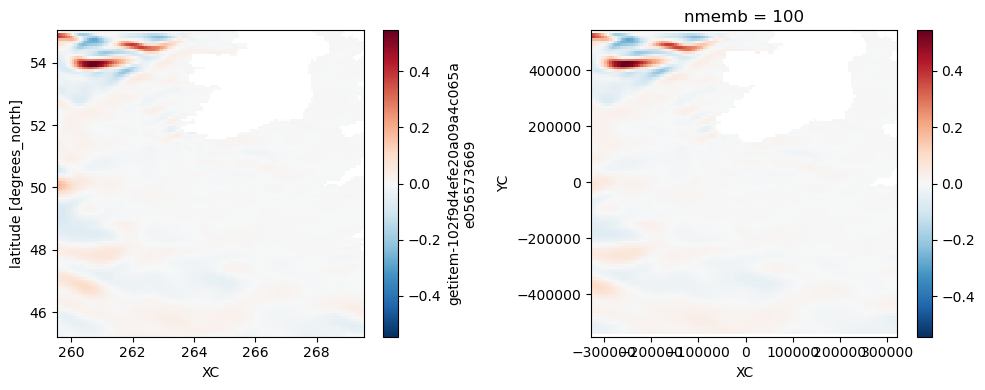

GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!


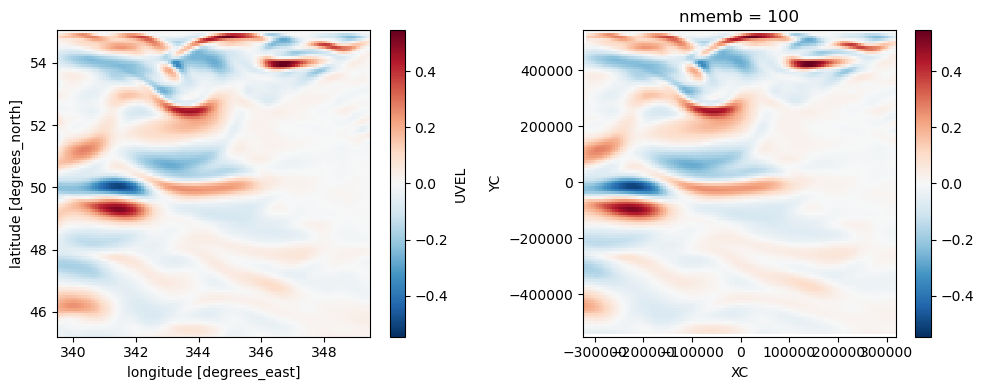

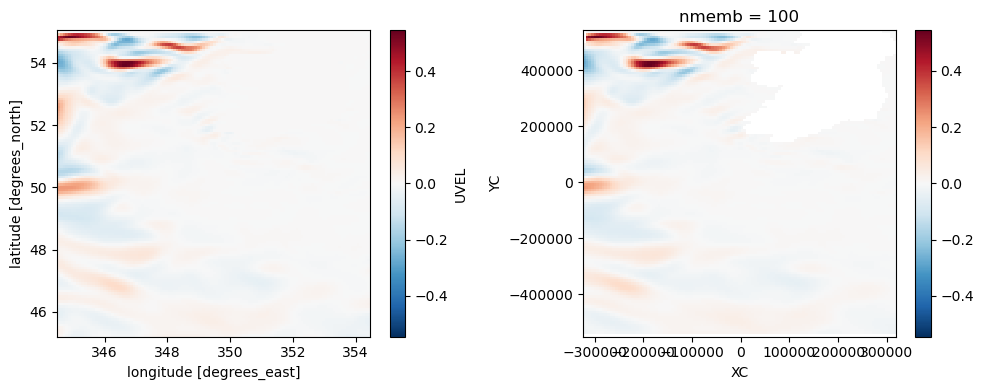

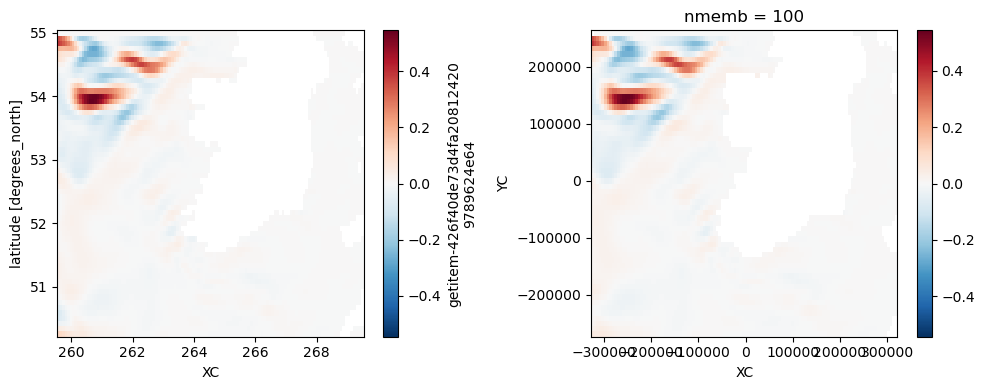

GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!
GOGO!!!


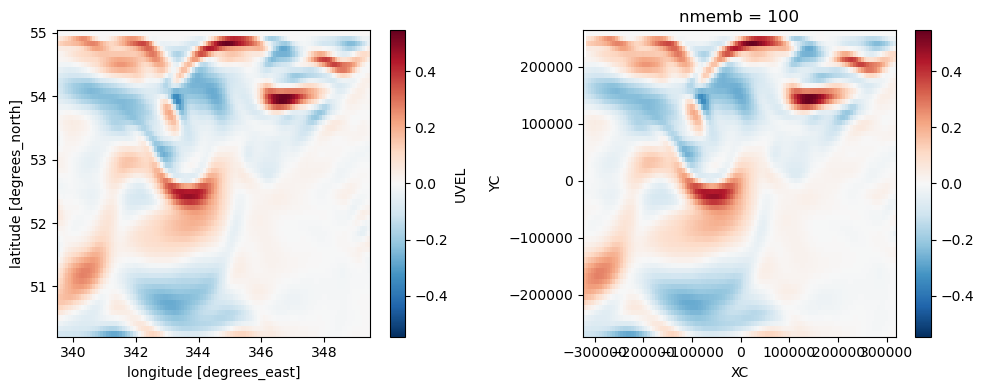

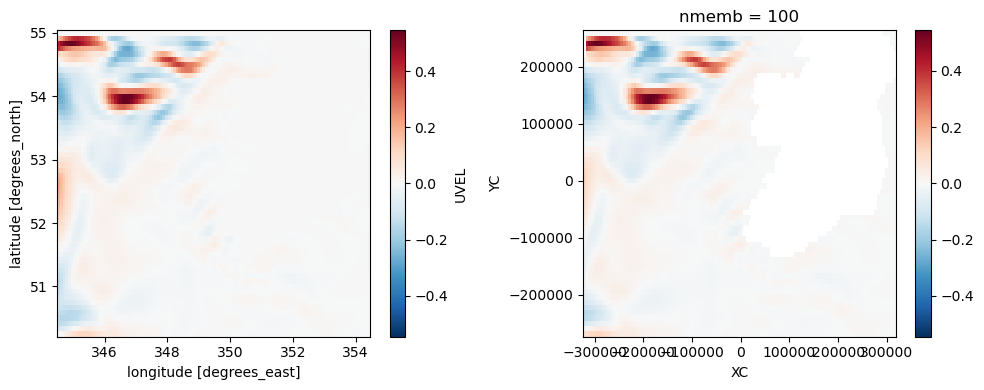

1419120


In [14]:
ystart = ySstart
nmembs = np.arange(100,148)

yys = yystart

for year in years[yystart:yystart+1]:
    if year == years[yystart]:
        mtimes = ntimes[yys,dd:dd+1]
    else:
        mtimes = ntimes[yys]
        
    for itime in mtimes:
        dsm = open_mdsdataset(op.join(ddir,'ensm/run%4d/ocn/' 
                                      % (year)), 
                              grid_dir=gdir,
                              prefix=['snap_diagOcn',], 
                              delta_t=2e2, iters=itime                              
                             ).isel(time=0,Z=1,Zl=1,Zp1=slice(None,2)
                                   ).chunk({'YC':ychunk,'YG':ychunk,
                                            'XC':xchunk,'XG':xchunk})
        coords = {
        # "T": {"center": "time"},
        "X": {"center": "XC",  "left" : "XG"},
        "Y": {"center": "YC",  "left" : "YG"},
        # "Z": {"center": "layer",  "outer": "layerp1", 
        #       "left"  : "layerl", "inner": "layerp0"
        #      }
       }
        grid = Grid(dsm, periodic=['X'],
                    coords=coords)
        
        for imemb in nmembs:
            if imemb == nmembs[0]:
                ds = open_mdsdataset(op.join(ddir,'memb%02d/run%4d/ocn/' 
                                             % (imemb,year)), 
                                     grid_dir=gdir,
                                     prefix=['snap_diagOcn',], 
                                     delta_t=2e2, iters=itime                              
                                    ).isel(Z=1,Zl=1,Zp1=slice(None,2)
                                          ).chunk({'YC':ychunk,'YG':ychunk,
                                                   'XC':xchunk,'XG':xchunk})
            else:
                ds = xr.concat([ds, open_mdsdataset(op.join(ddir,'memb%02d/run%4d/ocn/' 
                                                            % (imemb,year)), 
                                                    grid_dir=gdir,
                                                    prefix=['snap_diagOcn',], 
                                                    delta_t=2e2, iters=itime                              
                                                   ).isel(Z=1,Zl=1,Zp1=slice(None,2)
                                                         ).chunk({'YC':ychunk,'YG':ychunk,
                                                                  'XC':xchunk,'XG':xchunk})
                               ], 'nmemb')
        
        dse = ds.isel(time=0) - dsm
        dse.coords['nmemb'] = nmembs
        UV = grid.interp(dse.UVEL,'X')
        VV = grid.interp(dse.VVEL,'Y',boundary='extend')
        XT = grid.cumsum(ds.dxC,'X')
        YT = grid.cumsum(ds.dyC,'Y',boundary='extend')
        
        for lat in np.arange(ystart,yend+5,5):
            U = UV.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            V = VV.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            X = XT.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            Y = YT.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            mask = dse.maskC.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            for lon in np.arange(dsm.XC.min()-2.5,dsm.XC.max(),5):        
                xend = lon + 10
                if lon < dsm.XC.min():
                    dlon = dsm.XC.min() - lon
                    m = mask.sel(XC=slice(None,xend))
                    mm = mask.sel(XC=slice(dsm.XC.max()-dlon,None))
                    mmm = xr.concat([xr.DataArray(mm.data, dims=['YC','XC'],
                                                  coords={'YC':m.YC,
                                                          'XC':np.linspace(lon,
                                                                           lon+dlon,
                                                                           num=len(mm.XC)+1,
                                                                           endpoint=False)[1:]}
                                                 ),
                                     m
                                    ], 'XC').sortby('XC')
                    if mmm.astype(float).sum().values/np.array(mmm.shape).prod() > critt:
                        u  = U.sel(XC=slice(None,xend))
                        v  = V.sel(XC=slice(None,xend))
                        x  = X.sel(XC=slice(None,xend))
                        y  = Y.sel(XC=slice(None,xend))
                        ddx = dse.dxC.sel(YC=slice(lat,lat+10),XG=slice(None,xend)
                                         ).reset_coords(drop=True)
                        ddy = dse.dyC.sel(YG=slice(lat,lat+10),XC=slice(None,xend)
                                         ).reset_coords(drop=True)
                        a   = dse.rA.sel(YC=slice(lat,lat+10),
                                         XC=slice(None,xend)).reset_coords(drop=True)
                        uu  = U.sel(XC=slice(dsm.XC.max()-dlon,None))
                        vv  = V.sel(XC=slice(dsm.XC.max()-dlon,None))
                        xx  = (X.sel(XC=slice(dsm.XC.max()-dlon,None))
                               - X.sel(XC=slice(dsm.XC.max()-dlon,None)).isel(XC=0))
                        x = x + xx.isel(XC=-1)
                        # x.plot()
                        # plt.show()
                        yy  = Y.sel(XC=slice(dsm.XC.max()-dlon,None))
                        aa  = dse.rA.sel(YC=slice(lat,lat+10),
                                         XC=slice(dsm.XC.max()-dlon,None)
                                        ).reset_coords(drop=True)
                        dddx = dse.dxC.sel(YC=slice(lat,lat+10),XG=slice(None,xend)
                                          ).reset_coords(drop=True)
                        dddy = dse.dyC.sel(YG=slice(lat,lat+10),XC=slice(None,xend)
                                          ).reset_coords(drop=True)
                        uuu = xr.concat([xr.DataArray(uu.data, dims=['nmemb','YC','XC'],
                                                      coords={'YC':U.YC,
                                                              'XC':np.linspace(lon,
                                                                               lon+dlon,
                                                                               num=len(uu.XC)+1,
                                                                               endpoint=False)[1:]}
                                                     ),
                                         u
                                        ], 'XC').sortby('XC').where(mmm!=0.)
                        vvv = xr.concat([xr.DataArray(vv.data, dims=['nmemb','YC','XC'],
                                                      coords={'YC':V.YC,
                                                              'XC':np.linspace(lon,
                                                                               lon+dlon,
                                                                               num=len(vv.XC)+1,
                                                                               endpoint=False)[1:]}
                                                     ),
                                         v
                                        ], 'XC').sortby('XC').where(mmm!=0.)
                        xT = xr.concat([xr.DataArray(xx.data, dims=['YC','XC'],
                                                     coords={'YC':X.YC,
                                                             'XC':np.linspace(lon,
                                                                              lon+dlon,
                                                                              num=len(xx.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    ),
                                        x
                                       ], 'XC').sortby('XC')
                        yT = xr.concat([xr.DataArray(yy.data, dims=['YC','XC'],
                                                     coords={'YC':Y.YC,
                                                             'XC':np.linspace(lon,
                                                                              lon+dlon,
                                                                              num=len(yy.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    ),
                                        y
                                       ], 'XC').sortby('XC')
                        A = xr.concat([xr.DataArray(aa.data, dims=['YC','XC'],
                                                    coords={'YC':a.YC,
                                                            'XC':np.linspace(lon,
                                                                             lon+dlon,
                                                                             num=len(aa.XC)+1,
                                                                             endpoint=False)[1:]}
                                                   ),
                                       a
                                      ], 'XC').sortby('XC')
                        ny, nx = xT.shape
                        xT = (xT - xT.isel(XC=nx//2)).values.flatten()
                        yT = (yT - yT.isel(YC=ny//2)).values.flatten()
                        dx = xr.concat([xr.DataArray(dddx.data, dims=['YC','XG'],
                                                     coords={'YC':ddx.YC,
                                                             'XG':np.linspace(dsm.XG.min()-dlon,
                                                                              dsm.XG.min(),
                                                                              num=len(dddx.XG)+1,
                                                                              endpoint=False)[1:]}
                                                    ),
                                        ddx
                                       ], 'XG').min().values
                        dy = xr.concat([xr.DataArray(dddy.data, dims=['YG','XC'],
                                                     coords={'YG':ddy.YG,
                                                             'XC':np.linspace(lon,
                                                                              lon+dlon,
                                                                              num=len(dddy.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    ),
                                        ddy
                                       ], 'XC').min().values
                        yy = np.arange(-ny*dy/2,ny*dy/2,dy) 
                        xx = np.arange(-nx*dx/2,nx*dx/2,dx)
                        Uterp = xr.DataArray(np.zeros_like(uuu), dims=uuu.dims,
                                             coords={'nmemb':nmembs,'YC':yy,
                                                     'XC':xx}
                                            )
                        Vterp = xr.DataArray(np.zeros_like(vvv), dims=vvv.dims,
                                             coords={'nmemb':nmembs,'YC':yy,
                                                     'XC':xx}
                                            )
                        Aterp = xr.DataArray(np.zeros_like(A), 
                                             dims=A.dims,
                                             coords={'YC':yy,'XC':xx}
                                            )
                        xxx, yyy = np.mgrid[-nx*dx/2:nx*dx/2:dx, -ny*dy/2:ny*dy/2:dy]
                        for nn in range(len(nmembs)):
                            Uterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (uuu.where(mmm!=0.)
                                                          * A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T 
                            Vterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (vvv.where(mmm!=0.)
                                                          * A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T

                        Aterp = griddata((xT, yT), 
                                         A.values.flatten(),
                                         (xxx, yyy) 
                                        ).T
                        Uterp  = Uterp / Aterp
                        Vterp  = Vterp / Aterp
                        if itime == mtimes[0]:
                            fig, (ax1,ax2) = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
                            fig.set_tight_layout(True)
                            uuu.isel(nmemb=0).plot(ax=ax1)
                            Uterp.isel(nmemb=0).plot(ax=ax2)
                            plt.show()
                            
                elif xend > dsm.XC.max():
                    dlon = -dsm.XC.max() + xend
                    m = mask.sel(XC=slice(lon,None))
                    mm = mask.sel(XC=slice(None,dsm.XC.min()+dlon))
                    mmm = xr.concat([m,
                                     xr.DataArray(mm.data, dims=['YC','XC'],
                                                  coords={'YC':m.YC,
                                                          'XC':np.linspace(dsm.XC.max(),
                                                                           dsm.XC.max()+dlon,
                                                                           num=len(mm.XC)+1,
                                                                           endpoint=False)[1:]}
                                                 )
                                    ], 'XC').sortby('XC')
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        u = U.sel(XC=slice(lon,None))
                        v = V.sel(XC=slice(lon,None))
                        x = X.sel(XC=slice(lon,None))
                        y = Y.sel(XC=slice(lon,None))
                        ddx = dse.dxC.sel(YC=slice(lat,lat+10),XG=slice(lon,None)
                                         ).reset_coords(drop=True)
                        ddy = dse.dyC.sel(YG=slice(lat,lat+10),XC=slice(lon,None)
                                         ).reset_coords(drop=True)
                        a = dse.rA.sel(YC=slice(lat,lat+10),
                                       XC=slice(lon,None)).reset_coords(drop=True)
                        uu = U.sel(XC=slice(None,dsm.XC.min()+dlon))
                        vv = V.sel(XC=slice(None,dsm.XC.min()+dlon))
                        xx = X.sel(XC=slice(None,dsm.XC.min()+dlon))+X.isel(XC=-1)
                        yy = Y.sel(XC=slice(None,dsm.XC.min()+dlon))
                        aa = dse.rA.sel(YC=slice(lat,lat+10),
                                        XC=slice(None,dsm.XC.min()+dlon)
                                       ).reset_coords(drop=True)
                        dddx = dse.dxC.sel(YC=slice(lat,lat+10),XG=slice(None,dsm.XG.min()+dlon)
                                          ).reset_coords(drop=True)
                        dddy = dse.dyC.sel(YG=slice(lat,lat+10),XC=slice(None,dsm.XG.min()+dlon)
                                          ).reset_coords(drop=True)
                        uuu = xr.concat([u,
                                         xr.DataArray(uu.data, dims=['nmemb','YC','XC'],
                                                      coords={'YC':U.YC,
                                                              'XC':np.linspace(dsm.XC.max(),
                                                                               dsm.XC.max()+dlon,
                                                                               num=len(uu.XC)+1,
                                                                               endpoint=False)[1:]}
                                                     )
                                        ], 'XC').sortby('XC')
                        vvv = xr.concat([v,
                                         xr.DataArray(vv.data, dims=['nmemb','YC','XC'],
                                                      coords={'YC':V.YC,
                                                              'XC':np.linspace(dsm.XC.max(),
                                                                               dsm.XC.max()+dlon,
                                                                               num=len(vv.XC)+1,
                                                                               endpoint=False)[1:]}
                                                     )
                                        ], 'XC').sortby('XC')
                        xT = xr.concat([x,
                                        xr.DataArray(xx.data, dims=['YC','XC'],
                                                     coords={'YC':X.YC,
                                                             'XC':np.linspace(dsm.XC.max(),
                                                                              dsm.XC.max()+dlon,
                                                                              num=len(xx.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    )
                                       ], 'XC').sortby('XC')
                        yT = xr.concat([y,
                                        xr.DataArray(yy.data, dims=['YC','XC'],
                                                     coords={'YC':Y.YC,
                                                             'XC':np.linspace(dsm.XC.max(),
                                                                              dsm.XC.max()+dlon,
                                                                              num=len(yy.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    )
                                       ], 'XC').sortby('XC')
                        A = xr.concat([a,
                                       xr.DataArray(aa.data, dims=['YC','XC'],
                                                    coords={'YC':a.YC,
                                                            'XC':np.linspace(dsm.XC.max(),
                                                                             dsm.XC.max()+dlon,
                                                                             num=len(aa.XC)+1,
                                                                             endpoint=False)[1:]}
                                                   )
                                      ], 'XC').sortby('XC')
                        ny, nx = xT.shape
                        xT = (xT - xT.isel(XC=nx//2)).values.flatten()
                        yT = (yT - yT.isel(YC=ny//2)).values.flatten()
                        dx = xr.concat([ddx,
                                        xr.DataArray(dddx.data, dims=['YC','XG'],
                                                     coords={'YC':ddx.YC,
                                                             'XG':np.linspace(dsm.XG.max(),
                                                                              dsm.XG.max()+dlon,
                                                                              num=len(dddx.XG)+1,
                                                                              endpoint=False)[1:]}
                                                    )
                                       ], 'XG').min().values
                        dy = xr.concat([ddy,
                                        xr.DataArray(dddy.data, dims=['YG','XC'],
                                                     coords={'YG':ddy.YG,
                                                             'XC':np.linspace(dsm.XC.max(),
                                                                              dsm.XC.max()+dlon,
                                                                              num=len(dddy.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    )
                                       ], 'XC').min().values
                        yy = np.arange(-ny*dy/2,ny*dy/2,dy) 
                        xx = np.arange(-nx*dx/2,nx*dx/2,dx)
                        Uterp = xr.DataArray(np.zeros_like(uuu), dims=uuu.dims,
                                             coords={'nmemb':nmembs,'YC':yy,
                                                     'XC':xx}
                                            )
                        Vterp = xr.DataArray(np.zeros_like(vvv), dims=vvv.dims,
                                             coords={'nmemb':nmembs,'YC':yy,
                                                     'XC':xx}
                                            )
                        Aterp = xr.DataArray(np.zeros_like(A), 
                                             dims=A.dims,
                                             coords={'YC':yy,'XC':xx}
                                            )
                        xxx, yyy = np.mgrid[-nx*dx/2:nx*dx/2:dx, -ny*dy/2:ny*dy/2:dy]
                        for nn in range(len(nmembs)):
                            Uterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (uuu.where(mmm!=0.)
                                                          * A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T 

                            Vterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (vvv.where(mmm!=0.)
                                                          * A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T
                        Aterp = griddata((xT, yT), 
                                         A.values.flatten(),
                                         (xxx, yyy) 
                                        ).T
                        Uterp = Uterp / Aterp
                        Vterp = Vterp / Aterp
                        if itime == mtimes[0]:
                            fig, (ax1,ax2) = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
                            fig.set_tight_layout(True)
                            uuu.isel(nmemb=0).plot(ax=ax1)
                            Uterp.isel(nmemb=0).plot(ax=ax2)
                            plt.show()
                else:
                    mmm = mask.sel(XC=slice(lon,xend))
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        # print('GOGO!!!')
                        uuu = U.sel(XC=slice(lon,xend)).where(mmm!=0.)
                        vvv = V.sel(XC=slice(lon,xend)).where(mmm!=0.)
                        xT = X.sel(XC=slice(lon,xend))
                        yT = Y.sel(XC=slice(lon,xend))
                        A = dse.rA.sel(YC=slice(lat,lat+10),
                                       XC=slice(lon,xend)).where(mmm!=0.)
                        ny, nx = xT.shape
                        xT = (xT - xT.isel(XC=nx//2)).values.flatten()
                        yT = (yT - yT.isel(YC=ny//2)).values.flatten()
                        dx = ds.dxC.sel(YC=slice(lat,lat+10),XG=slice(lon,xend)
                                       ).min().values
                        dy = ds.dyC.sel(YG=slice(lat,lat+10),XC=slice(lon,xend)
                                       ).min().values
                        yy = np.arange(-ny*dy/2,ny*dy/2,dy) 
                        xx = np.arange(-nx*dx/2,nx*dx/2,dx)
                        Uterp = xr.DataArray(np.zeros_like(uuu), dims=uuu.dims,
                                             coords={'nmemb':nmembs,'YC':yy,
                                                     'XC':xx}
                                            )
                        Vterp = xr.DataArray(np.zeros_like(vvv), dims=vvv.dims,
                                             coords={'nmemb':nmembs,'YC':yy,
                                                     'XC':xx}
                                            )
                        Aterp = xr.DataArray(np.zeros_like(A), 
                                             dims=A.dims,
                                             coords={'YC':yy,'XC':xx}
                                            )
                        xxx, yyy = np.mgrid[-nx*dx/2:nx*dx/2:dx, -ny*dy/2:ny*dy/2:dy]
                        for nn in range(len(nmembs)):
                            Uterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (uuu*A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T 

                            Vterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (vvv*A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T
                        Aterp = griddata((xT, yT), 
                                         ds.rA.sel(YC=slice(lat,lat+10),
                                                   XC=slice(lon,xend)).values.flatten(),
                                         (xxx, yyy) 
                                        ).T
                        Uterp = Uterp / Aterp
                        Vterp = Vterp / Aterp
                        if itime == mtimes[0] and lon == dsm.XC.min():
                            fig, (ax1,ax2) = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
                            fig.set_tight_layout(True)
                            vvv.isel(nmemb=0).plot(ax=ax1)
                            Vterp.isel(nmemb=0).plot(ax=ax2)
                            plt.show()
                
                
                if crit > critt:
                    iso_psUf = xrft.isotropic_power_spectrum(
                                Uterp.interpolate_na(dim='XC').interpolate_na(dim='YC').fillna(0.), 
                                dim=["YC", "XC"], window='hann', 
                                window_correction=True, true_amplitude=True, truncate=True
                    ) 
                    iso_psVf = xrft.isotropic_power_spectrum(
                                Vterp.interpolate_na(dim='YC').interpolate_na(dim='XC').fillna(0.), 
                                dim=["YC", "XC"], window='hann', 
                                window_correction=True, true_amplitude=True, truncate=True
                    )
                    if itime == mtimes[0] and lon == dsm.XC.min():
                        fig, ax = plt.subplots()
                        ax.loglog(iso_psUf.freq_r*1e3, .5*(iso_psUf + iso_psVf).mean('nmemb'))
                        plt.show()
                    dsave = iso_psUf.to_dataset(name='U')
                    dsave['V'] = iso_psVf
                    la = A.YC.mean().values
                    lo = A.XC.mean().values
                    if la < 0.:
                        fname = ('Z0010/MOM/Snap/%010d/Fourier/Spectra/Lat-%03d_Lon%03d.zarr' 
                                 % (itime,np.floor(np.abs(la)),np.floor(lo)))
                    else:
                        fname = ('Z0010/MOM/Snap/%010d/Fourier/Spectra/Lat%03d_Lon%03d.zarr' 
                                 % (itime,np.floor(la),np.floor(lo)))
                    dsave.attrs['Lat'] = la
                    dsave.attrs['Lon'] = lo
                    dsave.to_zarr(op.join(spec,fname), mode='w')
                    dsave.close()

                    ss = xr.DataArray(np.linspace(iso_psUf.freq_r[-1].data**-1,
                                                  iso_psUf.freq_r[0].data**-1,40
                                                 )/xo,
                                      dims=['scale'], 
                                      coords={'scale':np.linspace(iso_psUf.freq_r[-1].data**-1,
                                                                  iso_psUf.freq_r[0].data**-1,40
                                                                 )/xo}
                    )
                    ssf = xr.DataArray(iso_psUf.freq_r.data**-1/xo, dims=['scale'], 
                                       coords={'scale':iso_psUf.freq_r.data**-1/xo}
                                      )
                    ssh = xr.concat([ss.where(ss>50e3/xo).dropna('scale')[::-1],
                                     ssf.where(ssf<50e3/xo).dropna('scale')
                                    ], 'scale')
                    iso_psUw = xwavelet.wvlt_power_spectrum(
                                    Uterp.chunk({'nmemb':1}), ssh, dim=["YC", "XC"], 
                                    xo=xo, ntheta=ntheta
                    ) 
                    iso_psVw = xwavelet.wvlt_power_spectrum(
                                    Vterp.chunk({'nmemb':1}), ssh, dim=["YC", "XC"], 
                                    xo=xo, ntheta=ntheta
                    )
                    if la < 0.:
                        fname = ('Z0010/MOM/Snap/%010d/Wavelet/Spectra/Lat-%03d_Lon%03d.zarr' 
                                 % (itime,np.floor(np.abs(la)),np.floor(lo)))
                    else:
                        fname = ('Z0010/MOM/Snap/%010d/Wavelet/Spectra/Lat%03d_Lon%03d.zarr' 
                                 % (itime,np.floor(la),np.floor(lo)))
                    dsave = iso_psUw.to_dataset(name='U')
                    dsave['V'] = iso_psVw
                    dsave.attrs['Lat'] = la
                    dsave.attrs['Lon'] = lo
                    dsave.to_zarr(op.join(spec,fname), mode='w')
                    dsave.close()
                    
        dse.close()
        dsm.close()
        ds.close()
        print(itime)
    yys += 1

In [15]:
ystart = ySstart
nmembs = np.arange(100,148)

yys = yystart
dsm = open_mdsdataset(op.join(ddir,'ensm/run%4d/ocn/' 
                              % (years[yystart])), 
                      grid_dir=gdir,
                      prefix=['snap_diagOcn',], 
                      delta_t=2e2, iters=ntimes[0,0]                              
                     ).isel(time=0
                           ).chunk({'YC':ychunk,'YG':ychunk,
                                    'XC':xchunk,'XG':xchunk})
coords = {
        # "T": {"center": "time"},
        "X": {"center": "XC",   "left" : "XG"},
        "Y": {"center": "YC",   "left" : "YG"},
        "Z": {"center": "Z" ,   "outer": "Zp1", 
              "left"  : "Zl",   "inner": "Zu"}
        }
grid = Grid(dsm, periodic=['X'],
            coords=coords)
KEslope_full = xr.DataArray(np.ones((len(np.arange(ystart+5,yend+10,5)),
                               len(np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5))
                              )), dims=['YC','XC'], 
                      coords={'YC':np.arange(ystart+5,yend+10,5),
                              'XC':np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5)}
                     ) * np.nan
KEslope = xr.DataArray(np.ones((len(np.arange(ystart+5,yend+10,5)),
                               len(np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5))
                              )), dims=['YC','XC'], 
                      coords={'YC':np.arange(ystart+5,yend+10,5),
                              'XC':np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5)}
                     ) * np.nan

for year in years[yystart:yystart+1]:
    if year == years[yystart]:
        mtimes = ntimes[yys,dd:dd+1]
    else:
        mtimes = ntimes[yys]
        
    for itime in mtimes:       
        iy = 0
        for lat in np.arange(ystart,yend+5,5):
            mask = dsm.maskC.isel(Z=1).sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            ix = 0
            for lon in np.arange(dsm.XC.min()-2.5,dsm.XC.max(),5):    
                xend = lon + 10
                if lon < dsm.XC.min():
                    dlon = dsm.XC.min() - lon
                    m = mask.sel(XC=slice(None,xend))
                    mm = mask.sel(XC=slice(dsm.XC.max()-dlon,None))
                    mmm = xr.concat([xr.DataArray(mm.data, dims=['YC','XC'],
                                                  coords={'YC':m.YC,
                                                          'XC':np.linspace(lon,
                                                                           lon+dlon,
                                                                           num=len(mm.XC)+1,
                                                                           endpoint=False)[1:]}
                                                 ),
                                     m
                                    ], 'XC').sortby('XC')
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        if la < 0.:
                            fname = (
                            'Z0010/MOM/Snap/%010d/Wavelet/Spectra/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname = (
                            'Z0010/MOM/Snap/%010d/Wavelet/Spectra/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        try:
                            ds_spec = xr.open_zarr(op.join(spec,fname))
                            _, slope, _ = xrft.fit_loglog((ds_spec.scale.sel(scale=slice(250e3,50e3))).values**-1,
                              (ds_spec.U + ds_spec.V
                              ).mean(['nmemb','angle']).sel(scale=slice(250e3,50e3)).values
                                                      )
                            if crit == 1.:
                                KEslope_full[dict(YC=iy,XC=ix)] = slope
                            else:
                                KEslope[dict(YC=iy,XC=ix)] = slope
                        except:
                            pass
                elif xend > dsm.XC.max():
                    dlon = -dsm.XC.max() + xend
                    m = mask.sel(XC=slice(lon,None))
                    mm = mask.sel(XC=slice(None,dsm.XC.min()+dlon))
                    mmm = xr.concat([m,
                                     xr.DataArray(mm.data, dims=['YC','XC'],
                                                  coords={'YC':m.YC,
                                                          'XC':np.linspace(dsm.XC.max(),
                                                                           dsm.XC.max()+dlon,
                                                                           num=len(mm.XC)+1,
                                                                           endpoint=False)[1:]}
                                                 )
                                    ], 'XC').sortby('XC')
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        if la < 0.:
                            fname = (
                            'Z0010/MOM/Snap/%010d/Wavelet/Spectra/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname = (
                            'Z0010/MOM/Snap/%010d/Wavelet/Spectra/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        try:
                            ds_spec = xr.open_zarr(op.join(spec,fname))
                            _, slope, _ = xrft.fit_loglog((ds_spec.scale.sel(scale=slice(250e3,50e3))).values**-1,
                              (ds_spec.U + ds_spec.V
                              ).mean(['nmemb','angle']).sel(scale=slice(250e3,50e3)).values
                                                      )
                            if crit == 1.:
                                KEslope_full[dict(YC=iy,XC=ix)] = slope
                            else:
                                KEslope[dict(YC=iy,XC=ix)] = slope
                        except:
                            pass
                else:
                    mmm = mask.sel(XC=slice(lon,xend))
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > critt:
                        if la < 0.:
                            fname = (
                            'Z0010/MOM/Snap/%010d/Wavelet/Spectra/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname = (
                            'Z0010/MOM/Snap/%010d/Wavelet/Spectra/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        try:
                            ds_spec = xr.open_zarr(op.join(spec,fname))
                            _, slope, _ = xrft.fit_loglog((ds_spec.scale.sel(scale=slice(250e3,50e3))).values**-1,
                              (ds_spec.U + ds_spec.V
                              ).mean(['nmemb','angle']).sel(scale=slice(250e3,50e3)).values
                                                      )
                            if crit == 1.:
                                KEslope_full[dict(YC=iy,XC=ix)] = slope
                            else:
                                KEslope[dict(YC=iy,XC=ix)] = slope  
                        except:
                            pass
                
                ds_spec.close()
                ix += 1
            iy += 1

        dsm.close()
        print(itime)
    yys += 1

# KEflux[dict(XC=0)] = KEflux.isel(XC=-1)
KEslope

1419120


<xarray.DataArray (YC: 15, XC: 18)>
array([[        nan,         nan,         nan,         nan, -3.29850319,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan, -3.39580329,         nan,         nan,
                nan,         nan,         nan],
       [        nan,         nan,         nan,         nan, -4.30083776,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan, -3.81044371,         nan,
                nan,         nan,         nan],
       [        nan,         nan,         nan, -3.76430232,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan, -3.59703536,         nan,
                nan,         nan,         nan],
       [-2.57838888, -3.11463443, -3.00515371, -2.36252083,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan, -2.68052471, -3.35401604,         nan,         nan,
                nan,         nan, -2.41015532],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan, -1.71103736,
        -3.06568017,         nan,         nan,         nan,         nan,
                nan, -3.40319801,         nan],
...
       [        nan,         nan,         nan,         nan,         nan,
        -2.98278581, -3.69007783, -4.0540129 ,         nan,         nan,
                nan,         nan, -3.30624908, -3.50509323, -3.11926154,
        -3.81550819, -3.87315777, -3.51266486],
       [        nan,         nan,         nan,         nan,         nan,
        -2.46142875, -3.80390224, -3.49259736,         nan,         nan,
                nan,         nan, -4.22119003, -4.11365025, -3.26114   ,
        -3.31979891,         nan, -2.00200994],
       [-2.46041386,         nan,         nan,         nan,         nan,
                nan,         nan, -3.98651787, -2.80565965, -3.90532603,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan, -2.53724185],
       [-2.28039305,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,  0.85961523, -2.25037964,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan, -2.20014509],
       [-4.10880651,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan, -2.95981518,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan, -2.70892139]])
Coordinates:
  * YC       (YC) float64 -14.8 -9.8 -4.8 0.2 5.2 ... 35.2 40.2 45.2 50.2 55.2
  * XC       (XC) float64 264.5 269.5 274.5 279.5 ... 334.5 339.5 344.5 349.5

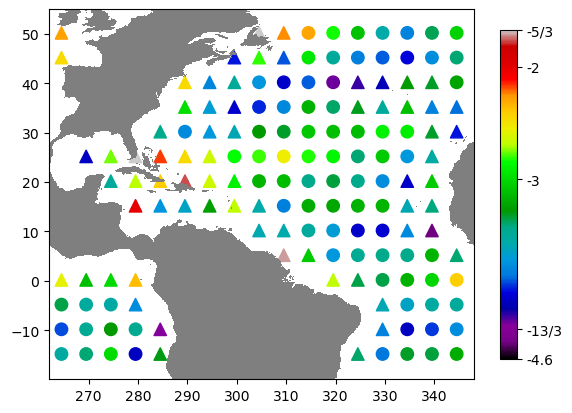

In [19]:
xx, yy = np.meshgrid(KEslope.XC, KEslope.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
im = ax.scatter(xx, yy, s=80, marker='^',
                c=KEslope.isel(YC=slice(None,-1)), cmap='nipy_spectral',
                vmin=-4.6, vmax=-5/3, rasterized=True
               )
ax.scatter(xx, yy, s=80,
                c=KEslope_full.isel(YC=slice(None,-1)), cmap='nipy_spectral',
                vmin=-4.6, vmax=-5/3, rasterized=True
               )
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=1),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)
cbar = fig.colorbar(im, ax=ax, shrink=.7)
cbar.set_ticks([-4.6,-13/3,-3,-2,-5/3])
cbar.set_ticklabels(['-4.6','-13/3','-3','-2','-5/3'])
plt.savefig(op.join(spec,'Figs/KEslope_Z0010_%010d.pdf' 
                    % (ntimes[0,0])))

# KE spectral transfer

In [ ]:
ystart = ySstart
nmembs = np.arange(100,148)

yys = yystart

for year in years[yystart:yystart+1]:
    if year == years[yystart]:
        mtimes = ntimes[yys,dd:dd+1]
    else:
        mtimes = ntimes[yys]
        
    for itime in mtimes:
        dsm = open_mdsdataset(op.join(ddir,'ensm/run%4d/ocn/' 
                                      % (year)), 
                              grid_dir=gdir,
                              prefix=['snap_diagOcn',], 
                              delta_t=2e2, iters=itime                              
                             ).isel(time=0
                                   ).chunk({'YC':ychunk,'YG':ychunk,
                                            'XC':xchunk,'XG':xchunk})
        coords = {
        # "T": {"center": "time"},
        "X": {"center": "XC",  "left" : "XG"},
        "Y": {"center": "YC",  "left" : "YG"},
        "Z": {"center": "Z" ,  "outer": "Zp1", 
              "left"  : "Zl",  "inner": "Zu"
             }
       }
        grid = Grid(dsm, periodic=['X'],
                    coords=coords)
        
        for imemb in nmembs:
            if imemb == nmembs[0]:
                ds = open_mdsdataset(op.join(ddir,'memb%02d/run%4d/ocn/' 
                                             % (imemb,year)), 
                                     grid_dir=gdir,
                                     prefix=['snap_diagOcn',], 
                                     delta_t=2e2, iters=itime                              
                                    ).isel(time=0
                                          ).chunk({'YC':ychunk,'YG':ychunk,
                                                   'XC':xchunk,'XG':xchunk})
            else:
                ds = xr.concat([ds, open_mdsdataset(op.join(ddir,'memb%02d/run%4d/ocn/' 
                                                            % (imemb,year)), 
                                                    grid_dir=gdir,
                                                    prefix=['snap_diagOcn',], 
                                                    delta_t=2e2, iters=itime                              
                                                   ).isel(time=0
                                                         ).chunk({'YC':ychunk,'YG':ychunk,
                                                                  'XC':xchunk,'XG':xchunk})
                               ], 'nmemb')
        
        dse = ds - dsm
        dse.coords['nmemb'] = nmembs
        UV = grid.interp(dse.UVEL,'X').isel(Z=18)
        VV = grid.interp(dse.VVEL,'Y',boundary='extend').isel(Z=18)
        XT = grid.cumsum(ds.dxC,'X')
        YT = grid.cumsum(ds.dyC,'Y',boundary='extend')
        
        xA = (ds.dyG * ds.drF).reset_coords(drop=True)
        yA = (ds.dxG * ds.drF).reset_coords(drop=True)

        UTrans = ds.UVEL * xA * ds.hFacW
        VTrans = ds.VVEL * yA * ds.hFacS
        RTrans = grid.interp(ds.WVEL,'X',boundary='extend') * ds.rAw
        Auup = (grid.interp(UTrans,'X')
                * grid.interp(dse.UVEL,'X')
               )
        Avup = (grid.interp(VTrans,'X')
                * grid.interp(dse.UVEL,'Y',boundary='extend')
               )
        Awup = (RTrans
                * grid.interp(dse.UVEL,'Z',boundary='extend')
               )
        RTrans = grid.interp(ds.WVEL,'Y',boundary='extend') * ds.rAs
        Auvp = (grid.interp(UTrans,'Y',boundary='extend')
                * grid.interp(dse.VVEL,'X')
               )
        Avvp = (grid.interp(VTrans,'Y',boundary='extend')
                * grid.interp(dse.VVEL,'Y',boundary='extend')
               )
        Awvp = (RTrans
                * grid.interp(dse.VVEL,'Z',boundary='extend')
               )
        Aut = grid.interp(((grid.diff(Auup,'X')
                            + grid.diff(Avup,'Y',boundary='extend')
                            - grid.diff(Awup,'Z',boundary='extend')
                           ) / ds.drF/ds.rAw
                          ).where(ds.maskW!=0.).reset_coords(drop=True),
                          'X',boundary='extend').isel(Z=18).compute()
        Avt = grid.interp(((grid.diff(Auvp,'X')
                            + grid.diff(Avvp,'Y',boundary='extend')
                            - grid.diff(Awvp,'Z',boundary='extend')
                           ) / ds.drF/ds.rAs
                          ).where(ds.maskS!=0.).reset_coords(drop=True),
                          'Y',boundary='extend').isel(Z=18).compute()
        
        for lat in range(ystart,yend+5,5):
            U  = UV.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            V  = VV.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            AU = Aut.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            AV = Avt.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            X  = XT.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            Y  = YT.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            mask = dse.maskInC.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            for lon in np.arange(dsm.XC.min()-2.5,dsm.XC.max(),5):        
                xend = lon + 10
                if lon < dsm.XC.min():
                    dlon = dsm.XC.min() - lon
                    m = mask.sel(XC=slice(None,xend))
                    mm = mask.sel(XC=slice(dsm.XC.max()-dlon,None))
                    mmm = xr.concat([xr.DataArray(mm.data, dims=['YC','XC'],
                                                  coords={'YC':m.YC,
                                                          'XC':np.linspace(lon,
                                                                           lon+dlon,
                                                                           num=len(mm.XC)+1,
                                                                           endpoint=False)[1:]}
                                                 ),
                                     m
                                    ], 'XC').sortby('XC')
                    if mmm.astype(float).sum()/np.array(mmm.shape).prod() > .8:
                        u  = U.sel(XC=slice(None,xend))
                        v  = V.sel(XC=slice(None,xend))
                        au = AU.sel(XC=slice(None,xend))
                        av = AV.sel(XC=slice(None,xend))
                        x  = X.sel(XC=slice(None,xend))
                        y  = Y.sel(XC=slice(None,xend))
                        ddx = dse.dxC.sel(YC=slice(lat,lat+10),XG=slice(None,xend)
                                         ).reset_coords(drop=True)
                        ddy = dse.dyC.sel(YG=slice(lat,lat+10),XC=slice(None,xend)
                                         ).reset_coords(drop=True)
                        a   = dse.rA.sel(YC=slice(lat,lat+10),
                                         XC=slice(None,xend)).reset_coords(drop=True)
                        uu  = U.sel(XC=slice(dsm.XC.max()-dlon,None))
                        vv  = V.sel(XC=slice(dsm.XC.max()-dlon,None))
                        auu = AU.sel(XC=slice(dsm.XC.max()-dlon,None))
                        avv = AV.sel(XC=slice(dsm.XC.max()-dlon,None))
                        xx  = (X.sel(XC=slice(dsm.XC.max()-dlon,None))
                               - X.sel(XC=slice(dsm.XC.max()-dlon,None)).isel(XC=0))
                        x = x + xx.isel(XC=-1)
                        x.plot()
                        plt.show()
                        yy  = Y.sel(XC=slice(dsm.XC.max()-dlon,None))
                        aa  = dse.rA.sel(YC=slice(lat,lat+10),
                                         XC=slice(dsm.XC.max()-dlon,None)
                                        ).reset_coords(drop=True)
                        dddx = dse.dxC.sel(YC=slice(lat,lat+10),XG=slice(None,xend)
                                          ).reset_coords(drop=True)
                        dddy = dse.dyC.sel(YG=slice(lat,lat+10),XC=slice(None,xend)
                                          ).reset_coords(drop=True)
                        uuu = xr.concat([xr.DataArray(uu.data, dims=['nmemb','YC','XC'],
                                                      coords={'YC':U.YC,
                                                              'XC':np.linspace(lon,
                                                                               lon+dlon,
                                                                               num=len(uu.XC)+1,
                                                                               endpoint=False)[1:]}
                                                     ),
                                         u
                                        ], 'XC').sortby('XC').where(mmm!=0.)
                        vvv = xr.concat([xr.DataArray(vv.data, dims=['nmemb','YC','XC'],
                                                      coords={'YC':V.YC,
                                                              'XC':np.linspace(lon,
                                                                               lon+dlon,
                                                                               num=len(vv.XC)+1,
                                                                               endpoint=False)[1:]}
                                                     ),
                                         v
                                        ], 'XC').sortby('XC').where(mmm!=0.)
                        aauu = xr.concat([xr.DataArray(auu.data, dims=['nmemb','YC','XC'],
                                                      coords={'YC':U.YC,
                                                              'XC':np.linspace(lon,
                                                                               lon+dlon,
                                                                               num=len(uu.XC)+1,
                                                                               endpoint=False)[1:]}
                                                     ),
                                          au
                                        ], 'XC').sortby('XC').where(mmm!=0.)
                        aavv = xr.concat([xr.DataArray(avv.data, dims=['nmemb','YC','XC'],
                                                      coords={'YC':V.YC,
                                                              'XC':np.linspace(lon,
                                                                               lon+dlon,
                                                                               num=len(vv.XC)+1,
                                                                               endpoint=False)[1:]}
                                                     ),
                                          av
                                        ], 'XC').sortby('XC').where(mmm!=0.)
                        xT = xr.concat([xr.DataArray(xx.data, dims=['YC','XC'],
                                                     coords={'YC':X.YC,
                                                             'XC':np.linspace(lon,
                                                                              lon+dlon,
                                                                              num=len(xx.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    ),
                                        x
                                       ], 'XC').sortby('XC')
                        yT = xr.concat([xr.DataArray(yy.data, dims=['YC','XC'],
                                                     coords={'YC':Y.YC,
                                                             'XC':np.linspace(lon,
                                                                              lon+dlon,
                                                                              num=len(yy.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    ),
                                        y
                                       ], 'XC').sortby('XC')
                        A = xr.concat([xr.DataArray(aa.data, dims=['YC','XC'],
                                                    coords={'YC':a.YC,
                                                            'XC':np.linspace(lon,
                                                                             lon+dlon,
                                                                             num=len(aa.XC)+1,
                                                                             endpoint=False)[1:]}
                                                   ),
                                       a
                                      ], 'XC').sortby('XC')
                        ny, nx = xT.shape
                        xT = (xT - xT.isel(XC=nx//2)).values.flatten()
                        yT = (yT - yT.isel(YC=ny//2)).values.flatten()
                        dx = xr.concat([xr.DataArray(dddx.data, dims=['YC','XG'],
                                                     coords={'YC':ddx.YC,
                                                             'XG':np.linspace(dsm.XG.min()-dlon,
                                                                              dsm.XG.min(),
                                                                              num=len(dddx.XG)+1,
                                                                              endpoint=False)[1:]}
                                                    ),
                                        ddx
                                       ], 'XG').min().values
                        dy = xr.concat([xr.DataArray(dddy.data, dims=['YG','XC'],
                                                     coords={'YG':ddy.YG,
                                                             'XC':np.linspace(lon,
                                                                              lon+dlon,
                                                                              num=len(dddy.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    ),
                                        ddy
                                       ], 'XC').min().values
                        yy = np.arange(-ny*dy/2,ny*dy/2,dy) 
                        xx = np.arange(-nx*dx/2,nx*dx/2,dx)
                        Uterp = xr.DataArray(np.zeros_like(uuu), dims=uuu.dims,
                                             coords={'nmemb':nmembs,'YC':yy,
                                                     'XC':xx}
                                            )
                        Vterp = xr.DataArray(np.zeros_like(vvv), dims=vvv.dims,
                                             coords={'nmemb':nmembs,'YC':yy,
                                                     'XC':xx}
                                            )
                        AUterp = xr.DataArray(np.zeros_like(aauu), dims=uuu.dims,
                                              coords={'nmemb':nmembs,'YC':yy,
                                                      'XC':xx}
                                             )
                        AVterp = xr.DataArray(np.zeros_like(aavv), dims=vvv.dims,
                                              coords={'nmemb':nmembs,'YC':yy,
                                                      'XC':xx}
                                             )
                        Aterp = xr.DataArray(np.zeros_like(A), 
                                             dims=A.dims,
                                             coords={'YC':yy,'XC':xx}
                                            )
                        xxx, yyy = np.mgrid[-nx*dx/2:nx*dx/2:dx, -ny*dy/2:ny*dy/2:dy]
                        for nn in range(len(nmembs)):
                            Uterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (uuu.where(mmm!=0.)
                                                          * A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T 
                            Vterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (vvv.where(mmm!=0.)
                                                          * A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T
                            AUterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (aauu.where(mmm!=0.)
                                                          * A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T 
                            AVterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (aavv.where(mmm!=0.)
                                                          * A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T
                        Aterp = griddata((xT, yT), 
                                         A.values.flatten(),
                                         (xxx, yyy) 
                                        ).T
                        Uterp  = Uterp / Aterp
                        Vterp  = Vterp / Aterp
                        AUterp = AUterp / Aterp
                        AVterp = AVterp / Aterp
                        if itime == mtimes[0]:
                            fig, (ax1,ax2) = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
                            fig.set_tight_layout(True)
                            aauu.isel(nmemb=0).plot(ax=ax1)
                            AUterp.isel(nmemb=0).plot(ax=ax2)
                            plt.show()
                            
                elif xend > dsm.XC.max():
                    dlon = -dsm.XC.max() + xend
                    m = mask.sel(XC=slice(lon,None))
                    mm = mask.sel(XC=slice(None,dsm.XC.min()+dlon))
                    mmm = xr.concat([m,
                                     xr.DataArray(mm.data, dims=['YC','XC'],
                                                  coords={'YC':m.YC,
                                                          'XC':np.linspace(dsm.XC.max(),
                                                                           dsm.XC.max()+dlon,
                                                                           num=len(mm.XC)+1,
                                                                           endpoint=False)[1:]}
                                                 )
                                    ], 'XC').sortby('XC')
                    if mmm.astype(float).sum()/np.array(mmm.shape).prod() > .8:
                        u  = U.sel(XC=slice(lon,None))
                        v  = V.sel(XC=slice(lon,None))
                        au = AU.sel(XC=slice(lon,None))
                        av = AV.sel(XC=slice(lon,None))
                        x  = X.sel(XC=slice(lon,None))
                        y  = Y.sel(XC=slice(lon,None))
                        ddx = dse.dxC.sel(YC=slice(lat,lat+10),XG=slice(lon,None)
                                         ).reset_coords(drop=True)
                        ddy = dse.dyC.sel(YG=slice(lat,lat+10),XC=slice(lon,None)
                                         ).reset_coords(drop=True)
                        a   = dse.rA.sel(YC=slice(lat,lat+10),
                                         XC=slice(lon,None)).reset_coords(drop=True)
                        uu  = U.sel(XC=slice(None,dsm.XC.min()+dlon))
                        vv  = V.sel(XC=slice(None,dsm.XC.min()+dlon))
                        auu = AU.sel(XC=slice(None,dsm.XC.min()+dlon))
                        avv = AV.sel(XC=slice(None,dsm.XC.min()+dlon))
                        xx  = X.sel(XC=slice(None,dsm.XC.min()+dlon))+X.isel(XC=-1)
                        yy  = Y.sel(XC=slice(None,dsm.XC.min()+dlon))
                        aa  = dse.rA.sel(YC=slice(lat,lat+10),
                                         XC=slice(None,dsm.XC.min()+dlon)
                                        ).reset_coords(drop=True)
                        dddx = dse.dxC.sel(YC=slice(lat,lat+10),XG=slice(None,dsm.XG.min()+dlon)
                                          ).reset_coords(drop=True)
                        dddy = dse.dyC.sel(YG=slice(lat,lat+10),XC=slice(None,dsm.XC.min()+dlon)
                                          ).reset_coords(drop=True)
                        uuu = xr.concat([u,
                                         xr.DataArray(uu.data, dims=['nmemb','YC','XC'],
                                                      coords={'YC':U.YC,
                                                              'XC':np.linspace(dsm.XC.max(),
                                                                               dsm.XC.max()+dlon,
                                                                               num=len(uu.XC)+1,
                                                                               endpoint=False)[1:]}
                                                     )
                                        ], 'XC').sortby('XC').where(mmm!=0.)
                        vvv = xr.concat([v,
                                         xr.DataArray(vv.data, dims=['nmemb','YC','XC'],
                                                      coords={'YC':V.YC,
                                                              'XC':np.linspace(dsm.XC.max(),
                                                                               dsm.XC.max()+dlon,
                                                                               num=len(vv.XC)+1,
                                                                               endpoint=False)[1:]}
                                                     )
                                        ], 'XC').sortby('XC').where(mmm!=0.)
                        aauu = xr.concat([au,
                                         xr.DataArray(auu.data, dims=['nmemb','YC','XC'],
                                                      coords={'YC':U.YC,
                                                              'XC':np.linspace(dsm.XC.max(),
                                                                               dsm.XC.max()+dlon,
                                                                               num=len(uu.XC)+1,
                                                                               endpoint=False)[1:]}
                                                     )
                                        ], 'XC').sortby('XC').where(mmm!=0.)
                        aavv = xr.concat([av,
                                         xr.DataArray(avv.data, dims=['nmemb','YC','XC'],
                                                      coords={'YC':V.YC,
                                                              'XC':np.linspace(dsm.XC.max(),
                                                                               dsm.XC.max()+dlon,
                                                                               num=len(vv.XC)+1,
                                                                               endpoint=False)[1:]}
                                                     )
                                        ], 'XC').sortby('XC').where(mmm!=0.)
                        xT = xr.concat([x,
                                        xr.DataArray(xx.data, dims=['YC','XC'],
                                                     coords={'YC':X.YC,
                                                             'XC':np.linspace(dsm.XC.max(),
                                                                              dsm.XC.max()+dlon,
                                                                              num=len(xx.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    )
                                       ], 'XC').sortby('XC')
                        yT = xr.concat([y,
                                        xr.DataArray(yy.data, dims=['YC','XC'],
                                                     coords={'YC':Y.YC,
                                                             'XC':np.linspace(dsm.XC.max(),
                                                                              dsm.XC.max()+dlon,
                                                                              num=len(yy.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    )
                                       ], 'XC').sortby('XC')
                        A = xr.concat([a,
                                       xr.DataArray(aa.data, dims=['YC','XC'],
                                                    coords={'YC':a.YC,
                                                            'XC':np.linspace(dsm.XC.max(),
                                                                             dsm.XC.max()+dlon,
                                                                             num=len(aa.XC)+1,
                                                                             endpoint=False)[1:]}
                                                   )
                                      ], 'XC').sortby('XC')
                        ny, nx = xT.shape
                        xT = (xT - xT.isel(XC=nx//2)).values.flatten()
                        yT = (yT - yT.isel(YC=ny//2)).values.flatten()
                        dx = xr.concat([ddx,
                                        xr.DataArray(dddx.data, dims=['YC','XG'],
                                                     coords={'YC':ddx.YC,
                                                             'XG':np.linspace(dsm.XG.max(),
                                                                              dsm.XG.max()+dlon,
                                                                              num=len(dddx.XG)+1,
                                                                              endpoint=False)[1:]}
                                                    )
                                       ], 'XG').min().values
                        dy = xr.concat([ddy,
                                        xr.DataArray(dddy.data, dims=['YG','XC'],
                                                     coords={'YG':ddy.YG,
                                                             'XC':np.linspace(dsm.XC.max(),
                                                                              dsm.XC.max()+dlon,
                                                                              num=len(dddy.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    )
                                       ], 'XC').min().values
                        yy = np.arange(-ny*dy/2,ny*dy/2,dy) 
                        xx = np.arange(-nx*dx/2,nx*dx/2,dx)
                        Uterp = xr.DataArray(np.zeros_like(uuu), dims=uuu.dims,
                                             coords={'nmemb':nmembs,'YC':yy,
                                                     'XC':xx}
                                            )
                        Vterp = xr.DataArray(np.zeros_like(vvv), dims=vvv.dims,
                                             coords={'nmemb':nmembs,'YC':yy,
                                                     'XC':xx}
                                            )
                        AUterp = xr.DataArray(np.zeros_like(aauu), dims=uuu.dims,
                                              coords={'nmemb':nmembs,'YC':yy,
                                                      'XC':xx}
                                             )
                        AVterp = xr.DataArray(np.zeros_like(aavv), dims=vvv.dims,
                                              coords={'nmemb':nmembs,'YC':yy,
                                                      'XC':xx}
                                             )
                        Aterp = xr.DataArray(np.zeros_like(A), 
                                             dims=A.dims,
                                             coords={'YC':yy,'XC':xx}
                                            )
                        xxx, yyy = np.mgrid[-nx*dx/2:nx*dx/2:dx, -ny*dy/2:ny*dy/2:dy]
                        for nn in range(len(nmembs)):
                            Uterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (uuu.where(mmm!=0.)
                                                          * A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T 
                            Vterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (vvv.where(mmm!=0.)
                                                          * A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T
                            AUterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (aauu.where(mmm!=0.)
                                                          * A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T 
                            AVterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (aavv.where(mmm!=0.)
                                                          * A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T
                        Aterp = griddata((xT, yT), 
                                         A.values.flatten(),
                                         (xxx, yyy) 
                                        ).T
                        Uterp  = Uterp / Aterp
                        Vterp  = Vterp / Aterp
                        AUterp = AUterp / Aterp
                        AVterp = AVterp / Aterp
                        if itime == mtimes[0]:
                            fig, (ax1,ax2) = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
                            fig.set_tight_layout(True)
                            aauu.isel(nmemb=0).plot(ax=ax1)
                            AUterp.isel(nmemb=0).plot(ax=ax2)
                            plt.show()
                else:
                    mmm = mask.sel(XC=slice(lon,xend))
                    if mmm.astype(float).sum().values/np.array(mmm.shape).prod() > .8:
                        uuu  = U.sel(XC=slice(lon,xend)).where(mmm!=0.)
                        vvv  = V.sel(XC=slice(lon,xend)).where(mmm!=0.)
                        aauu = AU.sel(XC=slice(lon,xend)).where(mmm!=0.)
                        aavv = AV.sel(XC=slice(lon,xend)).where(mmm!=0.)
                        xT   = X.sel(XC=slice(lon,xend))
                        yT   = Y.sel(XC=slice(lon,xend))
                        A = dse.rA.sel(YC=slice(lat,lat+10),
                                       XC=slice(lon,xend)).where(mmm!=0.)
                        ny, nx = xT.shape
                        xT = (xT - xT.isel(XC=nx//2)).values.flatten()
                        yT = (yT - yT.isel(YC=ny//2)).values.flatten()
                        dx = ds.dxC.sel(YC=slice(lat,lat+10),XG=slice(lon,xend)
                                       ).min().values
                        dy = ds.dyC.sel(YG=slice(lat,lat+10),XC=slice(lon,xend)
                                       ).min().values
                        yy = np.arange(-ny*dy/2,ny*dy/2,dy) 
                        xx = np.arange(-nx*dx/2,nx*dx/2,dx)
                        Uterp = xr.DataArray(np.zeros_like(uuu), dims=uuu.dims,
                                             coords={'nmemb':nmembs,'YC':yy,
                                                     'XC':xx}
                                            )
                        Vterp = xr.DataArray(np.zeros_like(vvv), dims=vvv.dims,
                                             coords={'nmemb':nmembs,'YC':yy,
                                                     'XC':xx}
                                            )
                        AUterp = xr.DataArray(np.zeros_like(aauu), dims=uuu.dims,
                                              coords={'nmemb':nmembs,'YC':yy,
                                                      'XC':xx}
                                             )
                        AVterp = xr.DataArray(np.zeros_like(aavv), dims=vvv.dims,
                                              coords={'nmemb':nmembs,'YC':yy,
                                                      'XC':xx}
                                             )
                        Aterp = xr.DataArray(np.zeros_like(A), 
                                             dims=A.dims,
                                             coords={'YC':yy,'XC':xx}
                                            )
                        xxx, yyy = np.mgrid[-nx*dx/2:nx*dx/2:dx, -ny*dy/2:ny*dy/2:dy]
                        for nn in range(len(nmembs)):
                            Uterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (uuu*A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T 
                            Vterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (vvv*A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T
                            AUterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (aauu*A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T 
                            AVterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (aavv*A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T
                        Aterp = griddata((xT, yT), 
                                         ds.rA.sel(YC=slice(lat,lat+10),
                                                   XC=slice(lon,xend)).values.flatten(),
                                         (xxx, yyy) 
                                        ).T
                        Uterp  = Uterp / Aterp
                        Vterp  = Vterp / Aterp
                        AUterp = AUterp / Aterp
                        AVterp = AVterp / Aterp
                        if itime == mtimes[0] and lon == dsm.XC.min():
                            fig, (ax1,ax2) = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
                            fig.set_tight_layout(True)
                            aavv.isel(nmemb=0).plot(ax=ax1)
                            AVterp.isel(nmemb=0).plot(ax=ax2)
                            plt.show()
                
                
                if mmm.astype(float).sum().values/np.array(mmm.shape).prod() > .8:
                    iso_csUf = xrft.isotropic_cross_spectrum(
                                Uterp.interpolate_na(dim='XC').interpolate_na(dim='YC').fillna(0.), 
                                AUterp.interpolate_na(dim='XC').interpolate_na(dim='YC').fillna(0.), 
                                dim=["YC", "XC"], window='hann', 
                                window_correction=True, true_amplitude=True, truncate=True
                    ) 
                    iso_csVf = xrft.isotropic_cross_spectrum(
                                Vterp.interpolate_na(dim='YC').interpolate_na(dim='XC').fillna(0.), 
                                AVterp.interpolate_na(dim='YC').interpolate_na(dim='XC').fillna(0.), 
                                dim=["YC", "XC"], window='hann', 
                                window_correction=True, true_amplitude=True, truncate=True
                    )
                    if itime == mtimes[0] and lon == dsm.XC.min():
                        fig, ax = plt.subplots()
                        ax.plot(iso_csUf.freq_r*1e3, -.5*(iso_csUf + iso_csVf).mean('nmemb'))
                        ax.set_xscale('log')
                        plt.show()
                    dsave = iso_csUf.to_dataset(name='U')
                    dsave['V'] = iso_csVf
                    la = A.YC.mean().values
                    lo = A.XC.mean().values
                    if la < 0.:
                        fname = (
                        'Z0452/MOM/Snap/%010d/Fourier/CrossSpectra/Lat-%03d_Lon%03d.zarr' 
                                 % (itime,np.floor(np.abs(la)),np.floor(lo)))
                    else:
                        fname = (
                        'Z0452/MOM/Snap/%010d/Fourier/CrossSpectra/Lat%03d_Lon%03d.zarr' 
                                 % (itime,np.floor(la),np.floor(lo)))
                    dsave.attrs['Lat'] = la
                    dsave.attrs['Lon'] = lo
                    dsave.to_zarr(op.join(spec,fname), mode='w')
                    dsave.close()

                    ss = xr.DataArray(np.linspace(iso_csUf.freq_r[-1].data**-1,
                                                  iso_csUf.freq_r[0].data**-1,40
                                                 )/xo,
                                      dims=['scale'], 
                                      coords={'scale':np.linspace(iso_csUf.freq_r[-1].data**-1,
                                                                  iso_csUf.freq_r[0].data**-1,40
                                                                 )/xo}
                    )
                    ssf = xr.DataArray(iso_csUf.freq_r.data**-1/xo, dims=['scale'], 
                                       coords={'scale':iso_csUf.freq_r.data**-1/xo}
                                      )
                    ssh = xr.concat([ss.where(ss>50e3/xo).dropna('scale')[::-1],
                                     ssf.where(ssf<50e3/xo).dropna('scale')
                                    ], 'scale')
                    iso_csUw = xwavelet.wvlt_cross_spectrum(
                                    Uterp.chunk({'nmemb':1}), AUterp.chunk({'nmemb':1}), 
                                    ssh, dim=["YC", "XC"], 
                                    xo=xo, ntheta=ntheta
                    ) 
                    iso_csVw = xwavelet.wvlt_cross_spectrum(
                                    Vterp.chunk({'nmemb':1}), AVterp.chunk({'nmemb':1}), 
                                    ssh, dim=["YC", "XC"], 
                                    xo=xo, ntheta=ntheta
                    )
                    if la < 0.:
                        fname = (
                        'Z0452/MOM/Snap/%010d/Wavelet/CrossSpectra/Lat-%03d_Lon%03d.zarr' 
                                 % (itime,np.floor(np.abs(la)),np.floor(lo)))
                    else:
                        fname = (
                        'Z0452/MOM/Snap/%010d/Wavelet/CrossSpectra/Lat%03d_Lon%03d.zarr' 
                                 % (itime,np.floor(la),np.floor(lo)))
                    dsave = iso_csUw.to_dataset(name='U')
                    dsave['V'] = iso_csVw
                    dsave.attrs['Lat'] = la
                    dsave.attrs['Lon'] = lo
                    dsave.to_zarr(op.join(spec,fname), mode='w')
                    dsave.close()
        dse.close()
        dsm.close()
        ds.close()
        print(itime)
    yys += 1

In [25]:
ystart = ySstart
nmembs = np.arange(100,148)

yys = yystart
dsm = open_mdsdataset(op.join(ddir,'ensm/run%4d/ocn/' 
                              % (years[yystart])), 
                      grid_dir=gdir,
                      prefix=['snap_diagOcn',], 
                      delta_t=2e2, iters=ntimes[0,0]                              
                     ).isel(time=0
                           ).chunk({'YC':ychunk,'YG':ychunk,
                                    'XC':xchunk,'XG':xchunk})
coords = {
        # "T": {"center": "time"},
        "X": {"center": "XC",     "left" : "XG"},
        "Y": {"center": "YC",     "left" : "YG"},
        "Z": {"center": "Z" ,     "outer": "Zp1", 
              "left"  : "Zl",     "inner": "Zu"}
        }
grid = Grid(dsm, periodic=['X'],
            coords=coords)
KEflux = xr.DataArray(np.ones((len(np.arange(ystart+5,yend+10,5)),
                               len(np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5))
                              )), dims=['YC','XC'], 
                      coords={'YC':np.arange(ystart+5,yend+10,5),
                              'XC':np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5)}
                     ) * np.nan
length = 400e3

for year in years[yystart:yystart+1]:
    if year == years[yystart]:
        mtimes = ntimes[yys,dd:dd+1]
    else:
        mtimes = ntimes[yys]
        
    for itime in mtimes:       
        iy = 0
        for lat in range(ystart,yend+5,5):
            mask = dsm.maskInC.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            ix = 0
            for lon in np.arange(dsm.XC.min()-2.5,dsm.XC.max(),5):    
                xend = lon + 10
                if lon < dsm.XC.min():
                    dlon = dsm.XC.min() - lon
                    m = mask.sel(XC=slice(None,xend))
                    mm = mask.sel(XC=slice(dsm.XC.max()-dlon,None))
                    mmm = xr.concat([xr.DataArray(mm.data, dims=['YC','XC'],
                                                  coords={'YC':m.YC,
                                                          'XC':np.linspace(lon,
                                                                           lon+dlon,
                                                                           num=len(mm.XC)+1,
                                                                           endpoint=False)[1:]}
                                                 ),
                                     m
                                    ], 'XC').sortby('XC')
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > .8:
                        if la < 0.:
                            fname = (
                            'Z0452/MOM/Snap/%010d/Wavelet/CrossSpectra/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname = (
                            'Z0452/MOM/Snap/%010d/Wavelet/CrossSpectra/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds_trans = xr.open_zarr(op.join(spec,fname))
                        dks = xr.DataArray(np.abs(np.diff(ds_trans.scale**-1)).data, 
                                           dims='scale',
                                           coords={'scale':.5*(ds_trans.scale[1:].data 
                                                               + ds_trans.scale[:-1].data)}
                                          ).interp(scale=ds_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})
                        Ak = -(ds_trans.U + ds_trans.V)

                        piw = (((Ak) * dks).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds_trans.angle)[0]*2
                              ).mean('nmemb')
                        KEflux[dict(YC=iy,XC=ix)] = piw.sel(scale=slice(length+10e03,length-10e3)
                                                           ).mean('scale')
                elif xend > dsm.XC.max():
                    dlon = -dsm.XC.max() + xend
                    m = mask.sel(XC=slice(lon,None))
                    mm = mask.sel(XC=slice(None,dsm.XC.min()+dlon))
                    mmm = xr.concat([m,
                                     xr.DataArray(mm.data, dims=['YC','XC'],
                                                  coords={'YC':m.YC,
                                                          'XC':np.linspace(dsm.XC.max(),
                                                                           dsm.XC.max()+dlon,
                                                                           num=len(mm.XC)+1,
                                                                           endpoint=False)[1:]}
                                                 )
                                    ], 'XC').sortby('XC')
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > .8:
                        if la < 0.:
                            fname = (
                            'Z0452/MOM/Snap/%010d/Wavelet/CrossSpectra/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname = (
                            'Z0452/MOM/Snap/%010d/Wavelet/CrossSpectra/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds_trans = xr.open_zarr(op.join(spec,fname))
                        dks = xr.DataArray(np.abs(np.diff(ds_trans.scale**-1)).data, 
                                           dims='scale',
                                           coords={'scale':.5*(ds_trans.scale[1:].data 
                                                               + ds_trans.scale[:-1].data)}
                                          ).interp(scale=ds_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})
                        Ak = -(ds_trans.U + ds_trans.V)

                        piw = (((Ak) * dks).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds_trans.angle)[0]*2
                              ).mean('nmemb')
                        KEflux[dict(YC=iy,XC=ix)] = piw.sel(scale=slice(length+10e03,length-10e3)
                                                           ).mean('scale')
                else:
                    mmm = mask.sel(XC=slice(lon,xend))
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > .8:
                        if la < 0.:
                            fname = (
                            'Z0452/MOM/Snap/%010d/Wavelet/CrossSpectra/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname = (
                            'Z0452/MOM/Snap/%010d/Wavelet/CrossSpectra/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds_trans = xr.open_zarr(op.join(spec,fname))
                        dks = xr.DataArray(np.abs(np.diff(ds_trans.scale**-1)).data, 
                                           dims='scale',
                                           coords={'scale':.5*(ds_trans.scale[1:].data 
                                                               + ds_trans.scale[:-1].data)}
                                          ).interp(scale=ds_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})
                        Ak = -(ds_trans.U + ds_trans.V)

                        piw = (((Ak) * dks).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds_trans.angle)[0]*2
                              ).mean('nmemb')
                        KEflux[dict(YC=iy,XC=ix)] = piw.sel(scale=slice(length+10e03,length-10e3)
                                                           ).mean('scale')    
                
                ds_trans.close()
                ix += 1
            iy += 1

        dsm.close()
        print(itime)
    yys += 1

# KEflux[dict(XC=0)] = KEflux.isel(XC=-1)
KEflux

1419120


<xarray.DataArray (YC: 15, XC: 18)>
array([[-1.82213285e-13, -6.91192697e-12,  1.13343363e-11,
         1.56843014e-12,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
        -6.58027471e-10, -8.62470228e-11, -3.37654808e-11,
        -2.60218663e-11, -1.45669755e-11, -9.32307280e-12],
       [ 1.13009665e-11,  5.50282549e-12, -1.63954945e-11,
         6.34514103e-12,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan, -1.61458590e-10, -2.53735738e-11,
        -1.10575215e-12,  5.22454061e-13,  1.33814857e-11],
       [-4.32858648e-11, -7.51627535e-12, -5.86866225e-12,
        -1.70474519e-11,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,  6.94024608e-10, -9.99758680e-11,
        -6.86354497e-11, -5.51362205e-11, -4.54932254e-11],
       [ 9.36684600e-11,  1.05072989e-10,  7.83073790e-12,
         2.67954845e-11,             nan,             nan,
...
         1.09291713e-10, -7.52503111e-12,  2.33622518e-11,
        -4.16618697e-11, -2.29137056e-10,             nan],
       [ 8.38637725e-12,             nan,             nan,
                    nan,             nan,             nan,
                    nan,  4.79411920e-12, -5.57947173e-10,
        -8.55396247e-10, -1.56230391e-09, -3.57829839e-09,
        -7.90916160e-10, -8.85451638e-10, -4.92406864e-10,
        -7.93852501e-10,  2.33106420e-10, -3.94180232e-12],
       [-8.53942465e-12,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
        -4.66669251e-13, -3.75121984e-10, -3.56216624e-10,
        -1.44924166e-10, -9.68061062e-10,  5.42809630e-11,
        -9.15380642e-10, -2.03579140e-10, -3.84732847e-11],
       [            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan]])
Coordinates:
  * YC       (YC) int64 -15 -10 -5 0 5 10 15 20 25 30 35 40 45 50 55
  * XC       (XC) float64 264.5 269.5 274.5 279.5 ... 334.5 339.5 344.5 349.5

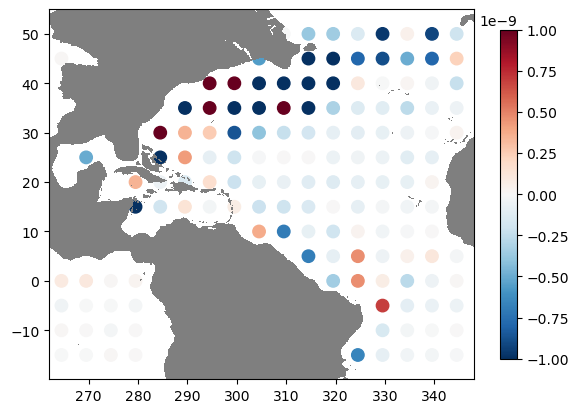

In [26]:
xx, yy = np.meshgrid(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
im = ax.scatter(xx, yy, 
                s=80,
                c=KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
              vmin=-1e-9, vmax=1e-9, rasterized=True
             )
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)
cbar = fig.colorbar(im, ax=ax, shrink=.7)
plt.savefig(op.join(spec,'Figs/KEflux_Z0452_s=%03dkm_%010d.pdf' 
                    % (int(length*1e-3),ntimes[0,0])))

# Enstrophy spectral transfer

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   XC --> left
  * left     XG --> center
Y Axis (not periodic, boundary=None):
  * center   YC --> left
  * left     YG --> center
Z Axis (not periodic, boundary=None):
  * center   Z --> left
  * outer    Zp1 --> center
  * left     Zl --> center
  * inner    Zu --> center


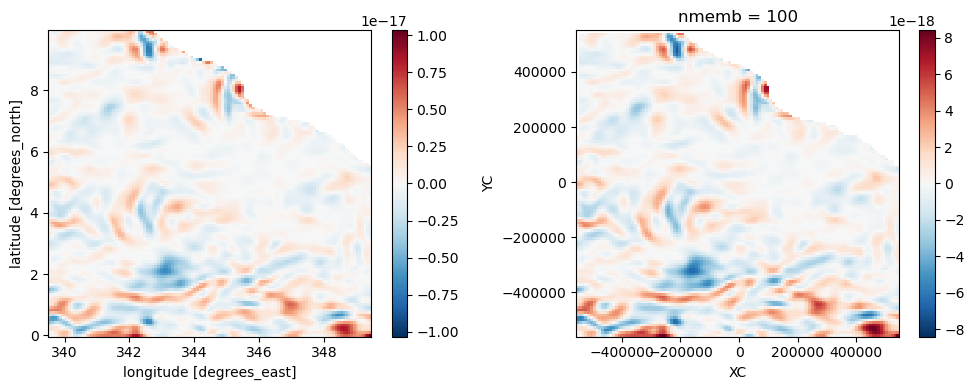

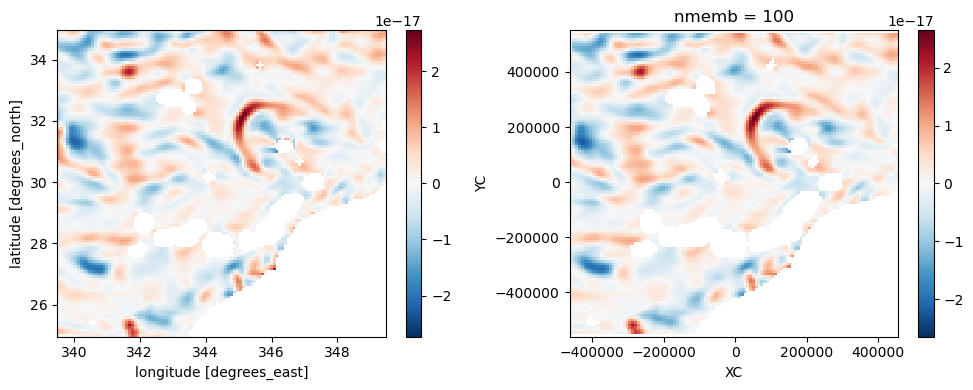

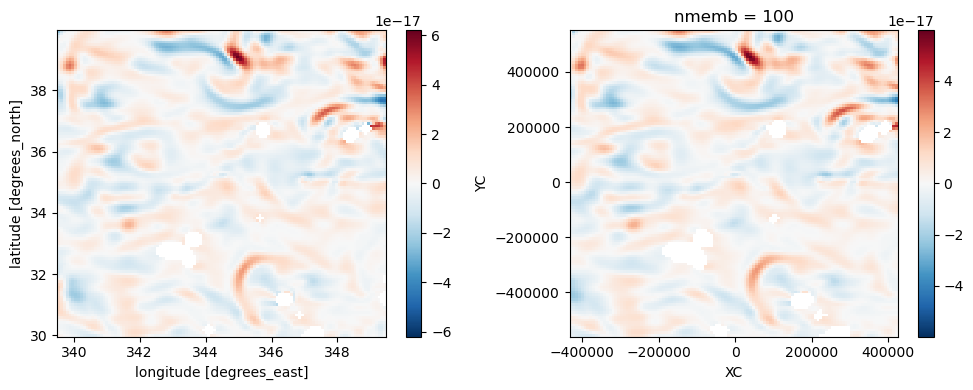

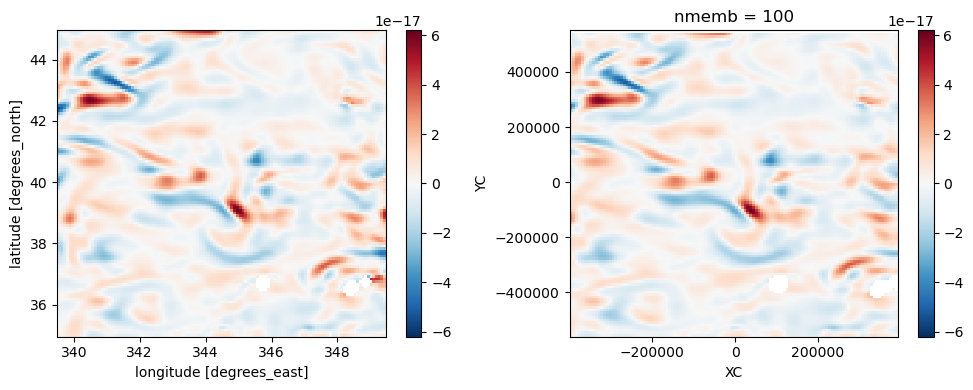

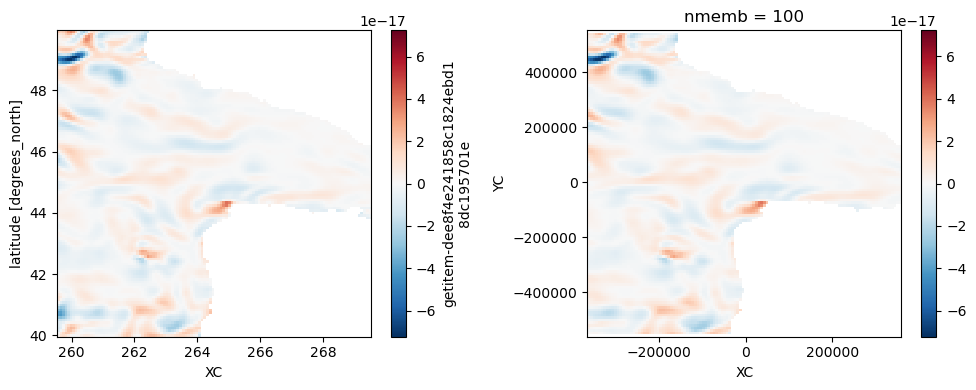

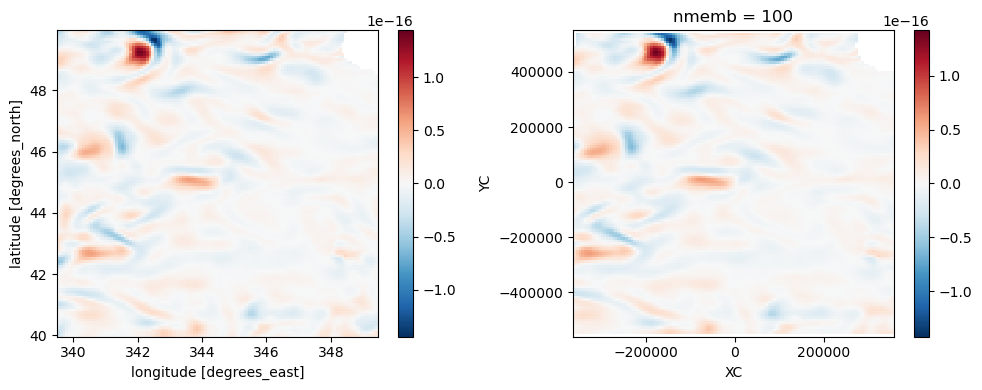

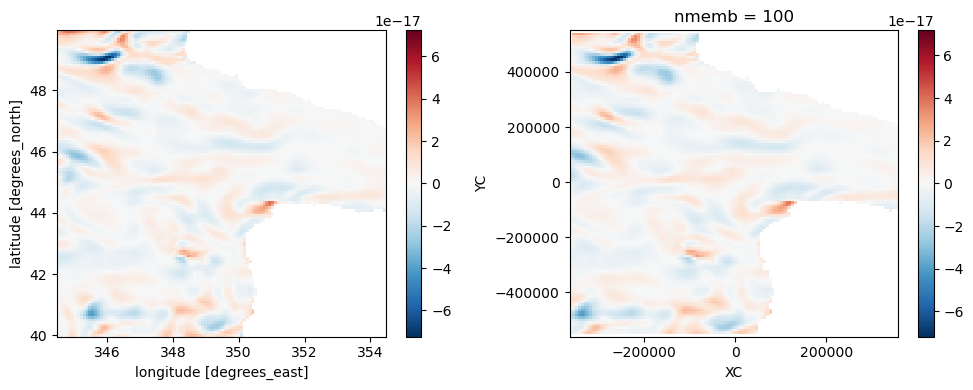

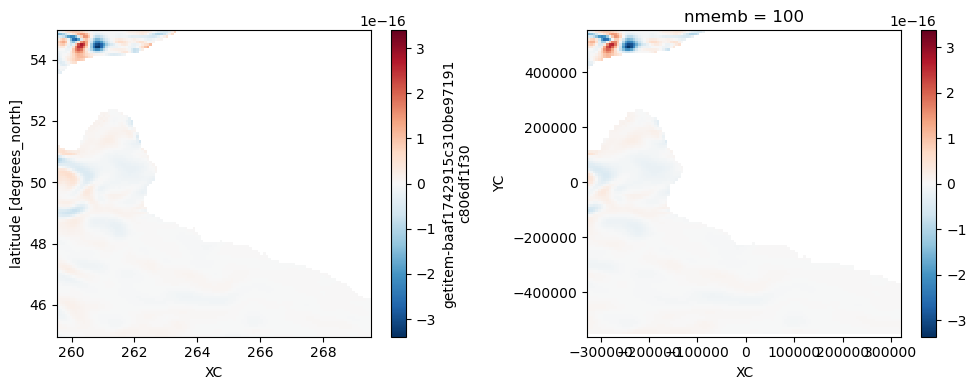

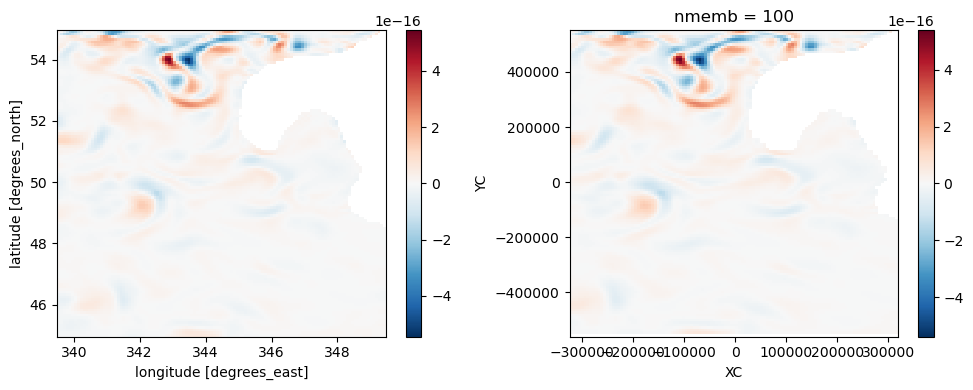

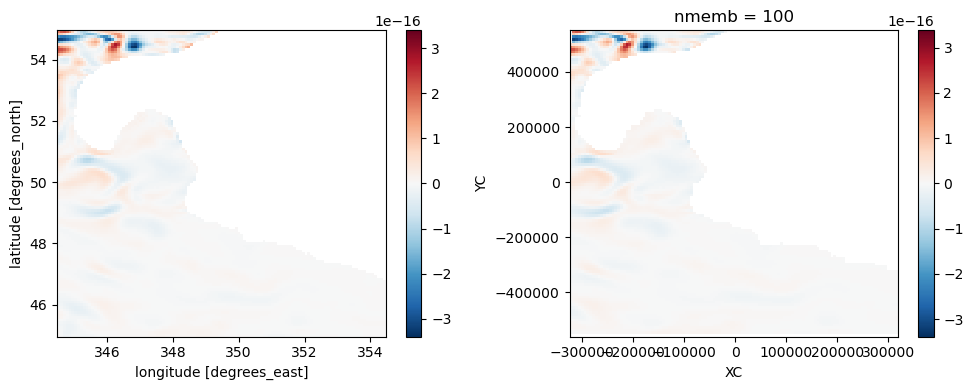

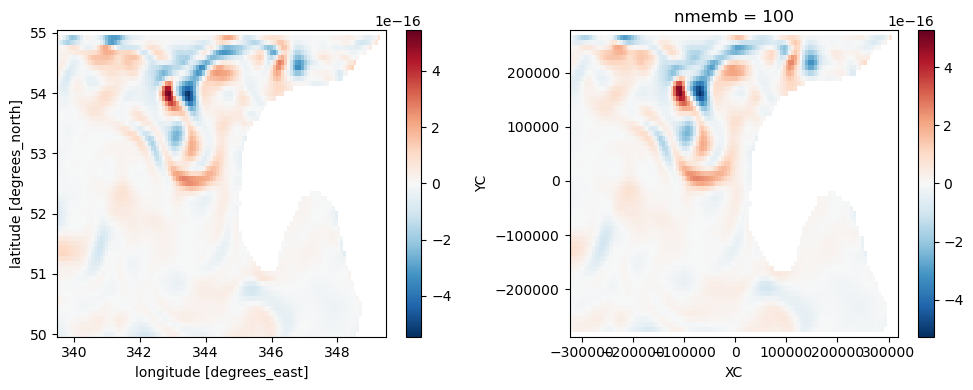

1419120


In [8]:
ystart = ySstart
nmembs = np.arange(100,148)

yys = yystart

for year in years[yystart:yystart+1]:
    if year == years[yystart]:
        mtimes = ntimes[yys,dd:dd+1]
    else:
        mtimes = ntimes[yys]
        
    for itime in mtimes:
        
        for imemb in nmembs:
            if imemb == nmembs[0]:
                ds = open_mdsdataset(op.join(ddir,'memb%02d/run%4d/ocn/' 
                                             % (imemb,year)), 
                                     grid_dir=gdir,
                                     prefix=['snap_diagOcn',], 
                                     delta_t=2e2, iters=itime                              
                                    ).isel(time=0
                                          ).chunk({'YC':ychunk,'YG':ychunk,
                                                   'XC':xchunk,'XG':xchunk})
            else:
                ds = xr.concat([ds, open_mdsdataset(op.join(ddir,'memb%02d/run%4d/ocn/' 
                                                            % (imemb,year)), 
                                                    grid_dir=gdir,
                                                    prefix=['snap_diagOcn',], 
                                                    delta_t=2e2, iters=itime                              
                                                   ).isel(time=0
                                                         ).chunk({'YC':ychunk,'YG':ychunk,
                                                                  'XC':xchunk,'XG':xchunk})
                               ], 'nmemb')
        coords = {
        # "T": {"center": "time"},
        "X": {"center": "XC",  "left" : "XG"},
        "Y": {"center": "YC",  "left" : "YG"},
        "Z": {"center": "Z" ,  "outer": "Zp1", 
              "left"  : "Zl",  "inner": "Zu"
             }
        }
        grid = Grid(ds, periodic=['X'],
                    coords=coords)
        if itime == mtimes[0]:
            print(grid)
        
        dsq = xr.open_zarr(
            '/tank/topog/tuchida/Wavelet-spectrum/SnapErtelPV/%2dmembers/%010d.zarr'
                           % (len(nmembs),itime)
                          )
        PVb = (dsq.bEPVh + dsq.bEPVv)
        PVp = (dsq.pEPVh + dsq.pEPVv)
        
        XT = grid.cumsum(ds.dxC,'X')
        YT = grid.cumsum(ds.dyC,'Y',boundary='extend')
        
        xA = (ds.dyG * ds.drF).reset_coords(drop=True)
        yA = (ds.dxG * ds.drF).reset_coords(drop=True)

        UTrans  = (ds.UVEL * xA * ds.hFacW).reset_coords(drop=True)
        VTrans  = (ds.VVEL * yA * ds.hFacS).reset_coords(drop=True)
        RtTrans = (ds.WVEL * ds.rA).reset_coords(drop=True)
        AUq = (UTrans
               * grid.interp(PVp,'X')
              )
        AVq = (VTrans
               * grid.interp(PVp,'Y',boundary='extend')
              )
        AWq = (RtTrans
               * grid.interp(PVp,'Z',boundary='extend')
              )

        Aq = ((grid.diff(AUq,'X')
               + grid.diff(AVq,'Y',boundary='extend')
               - grid.diff(AWq,'Z',boundary='extend')
              ) / ds.drF/ds.rA/ds.hFacC
             ).isel(Z=18)
        
        for lat in np.arange(ystart,yend+5,5)[4:]:
            Q    = PVp.isel(Z=18).sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            AQ   = Aq.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            X    = XT.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            Y    = YT.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            mask = ds.maskInC.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            for lon in np.arange(ds.XC.min()-2.5,ds.XC.max(),5):        
                xend = lon + 10
                if lon < ds.XC.min():
                    dlon = ds.XC.min() - lon
                    m = mask.sel(XC=slice(None,xend))
                    mm = mask.sel(XC=slice(ds.XC.max()-dlon,None))
                    mmm = xr.concat([xr.DataArray(mm.data, dims=['YC','XC'],
                                                  coords={'YC':m.YC,
                                                          'XC':np.linspace(lon,
                                                                           lon+dlon,
                                                                           num=len(mm.XC)+1,
                                                                           endpoint=False)[1:]}
                                                 ),
                                     m
                                    ], 'XC').sortby('XC')
                    if mmm.astype(float).sum()/np.array(mmm.shape).prod() > .8:
                        q   = Q.sel(XC=slice(None,xend))
                        aq  = AQ.sel(XC=slice(None,xend))
                        x   = X.sel(XC=slice(None,xend))
                        y   = Y.sel(XC=slice(None,xend))
                        ddx = ds.dxC.sel(YC=slice(lat,lat+10),XG=slice(None,xend)
                                        ).reset_coords(drop=True)
                        ddy = ds.dyC.sel(YG=slice(lat,lat+10),XC=slice(None,xend)
                                        ).reset_coords(drop=True)
                        a   = ds.rA.sel(YC=slice(lat,lat+10),
                                        XC=slice(None,xend)).reset_coords(drop=True)
                        qq  = Q.sel(XC=slice(ds.XC.max()-dlon,None))
                        aqq = AQ.sel(XC=slice(ds.XC.max()-dlon,None))
                        xx  = (X.sel(XC=slice(ds.XC.max()-dlon,None))
                               - X.sel(XC=slice(ds.XC.max()-dlon,None)).isel(XC=0))
                        x   = x + xx.isel(XC=-1)
                        # x.plot()
                        # plt.show()
                        yy  = Y.sel(XC=slice(ds.XC.max()-dlon,None))
                        aa  = ds.rA.sel(YC=slice(lat,lat+10),
                                        XC=slice(ds.XC.max()-dlon,None)
                                       ).reset_coords(drop=True)
                        dddx = ds.dxC.sel(YC=slice(lat,lat+10),XG=slice(None,xend)
                                         ).reset_coords(drop=True)
                        dddy = ds.dyC.sel(YG=slice(lat,lat+10),XC=slice(None,xend)
                                         ).reset_coords(drop=True)
                        qqq = xr.concat([xr.DataArray(qq.data, dims=['nmemb','YC','XC'],
                                                      coords={'YC':Q.YC,
                                                              'XC':np.linspace(lon,
                                                                               lon+dlon,
                                                                               num=len(qq.XC)+1,
                                                                               endpoint=False)[1:]}
                                                     ),
                                         q
                                        ], 'XC').sortby('XC').where(mmm!=0.)
                        aaqq = xr.concat([xr.DataArray(aqq.data, dims=['nmemb','YC','XC'],
                                                      coords={'YC':AQ.YC,
                                                              'XC':np.linspace(lon,
                                                                               lon+dlon,
                                                                               num=len(aqq.XC)+1,
                                                                               endpoint=False)[1:]}
                                                     ),
                                          aq
                                        ], 'XC').sortby('XC').where(mmm!=0.)
                        xT = xr.concat([xr.DataArray(xx.data, dims=['YC','XC'],
                                                     coords={'YC':X.YC,
                                                             'XC':np.linspace(lon,
                                                                              lon+dlon,
                                                                              num=len(xx.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    ),
                                        x
                                       ], 'XC').sortby('XC')
                        yT = xr.concat([xr.DataArray(yy.data, dims=['YC','XC'],
                                                     coords={'YC':Y.YC,
                                                             'XC':np.linspace(lon,
                                                                              lon+dlon,
                                                                              num=len(yy.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    ),
                                        y
                                       ], 'XC').sortby('XC')
                        A = xr.concat([xr.DataArray(aa.data, dims=['YC','XC'],
                                                    coords={'YC':a.YC,
                                                            'XC':np.linspace(lon,
                                                                             lon+dlon,
                                                                             num=len(aa.XC)+1,
                                                                             endpoint=False)[1:]}
                                                   ),
                                       a
                                      ], 'XC').sortby('XC')
                        ny, nx = xT.shape
                        xT = (xT - xT.isel(XC=nx//2)).values.flatten()
                        yT = (yT - yT.isel(YC=ny//2)).values.flatten()
                        dx = xr.concat([xr.DataArray(dddx.data, dims=['YC','XG'],
                                                     coords={'YC':ddx.YC,
                                                             'XG':np.linspace(ds.XG.min()-dlon,
                                                                              ds.XG.min(),
                                                                              num=len(dddx.XG)+1,
                                                                              endpoint=False)[1:]}
                                                    ),
                                        ddx
                                       ], 'XG').min().values
                        dy = xr.concat([xr.DataArray(dddy.data, dims=['YG','XC'],
                                                     coords={'YG':ddy.YG,
                                                             'XC':np.linspace(lon,
                                                                              lon+dlon,
                                                                              num=len(dddy.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    ),
                                        ddy
                                       ], 'XC').min().values
                        yy = np.arange(-ny*dy/2,ny*dy/2,dy) 
                        xx = np.arange(-nx*dx/2,nx*dx/2,dx)
                        Qterp = xr.DataArray(np.zeros_like(qqq), dims=qqq.dims,
                                             coords={'nmemb':nmembs,'YC':yy,
                                                     'XC':xx}
                                            )
                        AQterp = xr.DataArray(np.zeros_like(aaqq), dims=aaqq.dims,
                                              coords={'nmemb':nmembs,'YC':yy,
                                                      'XC':xx}
                                             )
                        Aterp = xr.DataArray(np.zeros_like(A), 
                                             dims=A.dims,
                                             coords={'YC':yy,'XC':xx}
                                            )
                        xxx, yyy = np.mgrid[-nx*dx/2:nx*dx/2:dx, -ny*dy/2:ny*dy/2:dy]
                        for nn in range(len(nmembs)):
                            Qterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (qqq.where(mmm!=0.)
                                                          * A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T 
                            AQterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (aaqq.where(mmm!=0.)
                                                          * A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T 
                        Aterp[:] = griddata((xT, yT), 
                                         A.values.flatten(),
                                         (xxx, yyy) 
                                        ).T
                        Qterp  = Qterp / Aterp
                        AQterp = AQterp / Aterp
                        if itime == mtimes[0]:
                            fig, (ax1,ax2) = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
                            fig.set_tight_layout(True)
                            aaqq.isel(nmemb=0).plot(ax=ax1)
                            AQterp.isel(nmemb=0).plot(ax=ax2)
                            plt.show()
                            
                elif xend > ds.XC.max():
                    dlon = -ds.XC.max() + xend
                    m = mask.sel(XC=slice(lon,None))
                    mm = mask.sel(XC=slice(None,ds.XC.min()+dlon))
                    mmm = xr.concat([m,
                                     xr.DataArray(mm.data, dims=['YC','XC'],
                                                  coords={'YC':m.YC,
                                                          'XC':np.linspace(ds.XC.max(),
                                                                           ds.XC.max()+dlon,
                                                                           num=len(mm.XC)+1,
                                                                           endpoint=False)[1:]}
                                                 )
                                    ], 'XC').sortby('XC')
                    if mmm.astype(float).sum()/np.array(mmm.shape).prod() > .8:
                        q   = Q.sel(XC=slice(lon,None))
                        aq  = AQ.sel(XC=slice(lon,None))
                        x   = X.sel(XC=slice(lon,None))
                        y   = Y.sel(XC=slice(lon,None))
                        ddx = ds.dxC.sel(YC=slice(lat,lat+10),XG=slice(lon,None)
                                        ).reset_coords(drop=True)
                        ddy = ds.dyC.sel(YG=slice(lat,lat+10),XC=slice(lon,None)
                                        ).reset_coords(drop=True)
                        a   = ds.rA.sel(YC=slice(lat,lat+10),
                                        XC=slice(lon,None)).reset_coords(drop=True)
                        qq  = Q.sel(XC=slice(None,ds.XC.min()+dlon))
                        aqq = AQ.sel(XC=slice(None,ds.XC.min()+dlon))
                        xx  = X.sel(XC=slice(None,ds.XC.min()+dlon))+X.isel(XC=-1)
                        yy  = Y.sel(XC=slice(None,ds.XC.min()+dlon))
                        aa  = ds.rA.sel(YC=slice(lat,lat+10),
                                        XC=slice(None,ds.XC.min()+dlon)
                                       ).reset_coords(drop=True)
                        dddx = ds.dxC.sel(YC=slice(lat,lat+10),XG=slice(None,ds.XG.min()+dlon)
                                         ).reset_coords(drop=True)
                        dddy = ds.dyC.sel(YG=slice(lat,lat+10),XC=slice(None,ds.XC.min()+dlon)
                                         ).reset_coords(drop=True)
                        qqq = xr.concat([q,
                                         xr.DataArray(qq.data, dims=['nmemb','YC','XC'],
                                                      coords={'YC':Q.YC,
                                                              'XC':np.linspace(ds.XC.max(),
                                                                               ds.XC.max()+dlon,
                                                                               num=len(qq.XC)+1,
                                                                               endpoint=False)[1:]}
                                                     )
                                        ], 'XC').sortby('XC').where(mmm!=0.)
                        aaqq = xr.concat([aq,
                                         xr.DataArray(aqq.data, dims=['nmemb','YC','XC'],
                                                      coords={'YC':AQ.YC,
                                                              'XC':np.linspace(ds.XC.max(),
                                                                               ds.XC.max()+dlon,
                                                                               num=len(aqq.XC)+1,
                                                                               endpoint=False)[1:]}
                                                     )
                                        ], 'XC').sortby('XC').where(mmm!=0.)
                        xT = xr.concat([x,
                                        xr.DataArray(xx.data, dims=['YC','XC'],
                                                     coords={'YC':X.YC,
                                                             'XC':np.linspace(ds.XC.max(),
                                                                              ds.XC.max()+dlon,
                                                                              num=len(xx.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    )
                                       ], 'XC').sortby('XC')
                        yT = xr.concat([y,
                                        xr.DataArray(yy.data, dims=['YC','XC'],
                                                     coords={'YC':Y.YC,
                                                             'XC':np.linspace(ds.XC.max(),
                                                                              ds.XC.max()+dlon,
                                                                              num=len(yy.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    )
                                       ], 'XC').sortby('XC')
                        A = xr.concat([a,
                                       xr.DataArray(aa.data, dims=['YC','XC'],
                                                    coords={'YC':a.YC,
                                                            'XC':np.linspace(ds.XC.max(),
                                                                             ds.XC.max()+dlon,
                                                                             num=len(aa.XC)+1,
                                                                             endpoint=False)[1:]}
                                                   )
                                      ], 'XC').sortby('XC')
                        ny, nx = xT.shape
                        xT = (xT - xT.isel(XC=nx//2)).values.flatten()
                        yT = (yT - yT.isel(YC=ny//2)).values.flatten()
                        dx = xr.concat([ddx,
                                        xr.DataArray(dddx.data, dims=['YC','XG'],
                                                     coords={'YC':ddx.YC,
                                                             'XG':np.linspace(ds.XG.max(),
                                                                              ds.XG.max()+dlon,
                                                                              num=len(dddx.XG)+1,
                                                                              endpoint=False)[1:]}
                                                    )
                                       ], 'XG').min().values
                        dy = xr.concat([ddy,
                                        xr.DataArray(dddy.data, dims=['YG','XC'],
                                                     coords={'YG':ddy.YG,
                                                             'XC':np.linspace(ds.XC.max(),
                                                                              ds.XC.max()+dlon,
                                                                              num=len(dddy.XC)+1,
                                                                              endpoint=False)[1:]}
                                                    )
                                       ], 'XC').min().values
                        yy = np.arange(-ny*dy/2,ny*dy/2,dy) 
                        xx = np.arange(-nx*dx/2,nx*dx/2,dx)
                        Qterp = xr.DataArray(np.zeros_like(qqq), dims=qqq.dims,
                                             coords={'nmemb':nmembs,'YC':yy,
                                                     'XC':xx}
                                            )
                        AQterp = xr.DataArray(np.zeros_like(aaqq), dims=aaqq.dims,
                                              coords={'nmemb':nmembs,'YC':yy,
                                                      'XC':xx}
                                             )
                        Aterp = xr.DataArray(np.zeros_like(A), 
                                             dims=A.dims,
                                             coords={'YC':yy,'XC':xx}
                                            )
                        xxx, yyy = np.mgrid[-nx*dx/2:nx*dx/2:dx, -ny*dy/2:ny*dy/2:dy]
                        for nn in range(len(nmembs)):
                            Qterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (qqq.where(mmm!=0.)
                                                          * A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T 
                            AQterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (aaqq.where(mmm!=0.)
                                                          * A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T 
                        Aterp[:] = griddata((xT, yT), 
                                         A.values.flatten(),
                                         (xxx, yyy) 
                                        ).T
                        Qterp  = Qterp / Aterp
                        AQterp = AQterp / Aterp
                        if itime == mtimes[0]:
                            fig, (ax1,ax2) = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
                            fig.set_tight_layout(True)
                            aaqq.isel(nmemb=0).plot(ax=ax1)
                            AQterp.isel(nmemb=0).plot(ax=ax2)
                            plt.show()
                else:
                    mmm = mask.sel(XC=slice(lon,xend))
                    if mmm.astype(float).sum().values/np.array(mmm.shape).prod() > .8:
                        qqq  = Q.sel(XC=slice(lon,xend)).where(mmm!=0.)
                        aaqq = AQ.sel(XC=slice(lon,xend)).where(mmm!=0.)
                        xT   = X.sel(XC=slice(lon,xend))
                        yT   = Y.sel(XC=slice(lon,xend))
                        A    = ds.rA.sel(YC=slice(lat,lat+10),
                                         XC=slice(lon,xend)).where(mmm!=0.)
                        ny, nx = xT.shape
                        xT   = (xT - xT.isel(XC=nx//2)).values.flatten()
                        yT   = (yT - yT.isel(YC=ny//2)).values.flatten()
                        dx   = ds.dxC.sel(YC=slice(lat,lat+10),XG=slice(lon,xend)
                                         ).min().values
                        dy   = ds.dyC.sel(YG=slice(lat,lat+10),XC=slice(lon,xend)
                                         ).min().values
                        yy   = np.arange(-ny*dy/2,ny*dy/2,dy) 
                        xx   = np.arange(-nx*dx/2,nx*dx/2,dx)
                        Qterp = xr.DataArray(np.zeros_like(qqq), dims=qqq.dims,
                                             coords={'nmemb':nmembs,'YC':yy,
                                                     'XC':xx}
                                            )
                        AQterp = xr.DataArray(np.zeros_like(aaqq), dims=aaqq.dims,
                                              coords={'nmemb':nmembs,'YC':yy,
                                                      'XC':xx}
                                             )
                        Aterp = xr.DataArray(np.zeros_like(A), 
                                             dims=A.dims,
                                             coords={'YC':yy,'XC':xx}
                                            )
                        xxx, yyy = np.mgrid[-nx*dx/2:nx*dx/2:dx, -ny*dy/2:ny*dy/2:dy]
                        for nn in range(len(nmembs)):
                            Qterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (qqq*A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T 
                            AQterp[dict(nmemb=nn)] = griddata((xT, yT), 
                                                         (aaqq*A).isel(nmemb=nn).values.flatten(),
                                                         (xxx, yyy) 
                                                            ).T 
                        Aterp[:] = griddata((xT, yT), 
                                         ds.rA.sel(YC=slice(lat,lat+10),
                                                   XC=slice(lon,xend)).values.flatten(),
                                         (xxx, yyy) 
                                        ).T
                        Qterp  = Qterp / Aterp
                        AQterp = AQterp / Aterp
                        if itime == mtimes[0] and lon == ds.XC.min():
                            fig, (ax1,ax2) = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
                            fig.set_tight_layout(True)
                            aaqq.isel(nmemb=0).plot(ax=ax1)
                            AQterp.isel(nmemb=0).plot(ax=ax2)
                            plt.show()
                
                
                if mmm.astype(float).sum().values/np.array(mmm.shape).prod() > .8:
                    iso_csQf = xrft.isotropic_cross_spectrum(
                                Qterp.interpolate_na(dim='XC').interpolate_na(dim='YC').fillna(0.), 
                                AQterp.interpolate_na(dim='XC').interpolate_na(dim='YC').fillna(0.), 
                                dim=["YC", "XC"], window='hann', 
                                window_correction=True, true_amplitude=True, truncate=True
                    ) 
                    if itime == mtimes[0] and lon == ds.XC.min():
                        fig, ax = plt.subplots()
                        ax.plot(iso_csQf.freq_r*1e3, -(iso_csQf).mean('nmemb'))
                        ax.set_xscale('log')
                        plt.show()
                    dsave = iso_csQf.to_dataset(name='Q')
                    la = A.YC.mean().values
                    lo = A.XC.mean().values
                    if la < 0.:
                        fname = (
                        'Z0452/EPV/Snap/%010d/Fourier/CrossSpectra/Lat-%03d_Lon%03d.zarr' 
                                 % (itime,np.floor(np.abs(la)),np.floor(lo)))
                    else:
                        fname = (
                        'Z0452/EPV/Snap/%010d/Fourier/CrossSpectra/Lat%03d_Lon%03d.zarr' 
                                 % (itime,np.floor(la),np.floor(lo)))
                    dsave.attrs['Lat'] = la
                    dsave.attrs['Lon'] = lo
                    dsave.to_zarr(op.join(spec,fname), mode='w')
                    dsave.close()

                    ss = xr.DataArray(np.linspace(iso_csQf.freq_r[-1].data**-1,
                                                  iso_csQf.freq_r[0].data**-1,40
                                                 )/xo,
                                      dims=['scale'], 
                                      coords={'scale':np.linspace(iso_csQf.freq_r[-1].data**-1,
                                                                  iso_csQf.freq_r[0].data**-1,40
                                                                 )/xo}
                    )
                    ssf = xr.DataArray(iso_csQf.freq_r.data**-1/xo, dims=['scale'], 
                                       coords={'scale':iso_csQf.freq_r.data**-1/xo}
                                      )
                    ssh = xr.concat([ss.where(ss>50e3/xo).dropna('scale')[::-1],
                                     ssf.where(ssf<50e3/xo).dropna('scale')
                                    ], 'scale')
                    iso_csQw = xwavelet.wvlt_cross_spectrum(
                                    Qterp.chunk({'nmemb':1}), AQterp.chunk({'nmemb':1}), 
                                    ssh, dim=["YC", "XC"], 
                                    xo=xo, ntheta=ntheta
                    ) 
                    if la < 0.:
                        fname = (
                        'Z0452/EPV/Snap/%010d/Wavelet/CrossSpectra/Lat-%03d_Lon%03d.zarr' 
                                 % (itime,np.floor(np.abs(la)),np.floor(lo)))
                    else:
                        fname = (
                        'Z0452/EPV/Snap/%010d/Wavelet/CrossSpectra/Lat%03d_Lon%03d.zarr' 
                                 % (itime,np.floor(la),np.floor(lo)))
                    dsave = iso_csQw.to_dataset(name='Q')
                    dsave.attrs['Lat'] = la
                    dsave.attrs['Lon'] = lo
                    dsave.to_zarr(op.join(spec,fname), mode='w')
                    dsave.close()
        dsq.close()
        ds.close()
        print(itime)
    yys += 1

In [20]:
ystart = ySstart
nmembs = np.arange(100,148)

yys = yystart
dsm = open_mdsdataset(op.join(ddir,'ensm/run%4d/ocn/' 
                              % (years[yystart])), 
                      grid_dir=gdir,
                      prefix=['snap_diagOcn',], 
                      delta_t=2e2, iters=ntimes[0,0]                              
                     ).isel(time=0
                           ).chunk({'YC':ychunk,'YG':ychunk,
                                    'XC':xchunk,'XG':xchunk})
coords = {
        # "T": {"center": "time"},
        "X": {"center": "XC",     "left" : "XG"},
        "Y": {"center": "YC",     "left" : "YG"},
        "Z": {"center": "Z" ,     "outer": "Zp1", 
              "left"  : "Zl",     "inner": "Zu"}
        }
grid = Grid(dsm, periodic=['X'],
            coords=coords)
Ensflux = xr.DataArray(np.ones((len(np.arange(ystart+5,yend+10,5)),
                               len(np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5))
                              )), dims=['YC','XC'], 
                      coords={'YC':np.arange(ystart+5,yend+10,5),
                              'XC':np.arange(dsm.XC.min()+2.5,dsm.XC.max()+5,5)}
                     ) * np.nan
length = 400e3

for year in years[yystart:yystart+1]:
    if year == years[yystart]:
        mtimes = ntimes[yys,dd:dd+1]
    else:
        mtimes = ntimes[yys]
        
    for itime in mtimes:       
        iy = 0
        for lat in range(ystart,yend+5,5):
            mask = dsm.maskInC.sel(YC=slice(lat,lat+10)).reset_coords(drop=True)
            ix = 0
            for lon in np.arange(dsm.XC.min()-2.5,dsm.XC.max(),5):    
                xend = lon + 10
                if lon < dsm.XC.min():
                    dlon = dsm.XC.min() - lon
                    m = mask.sel(XC=slice(None,xend))
                    mm = mask.sel(XC=slice(dsm.XC.max()-dlon,None))
                    mmm = xr.concat([xr.DataArray(mm.data, dims=['YC','XC'],
                                                  coords={'YC':m.YC,
                                                          'XC':np.linspace(lon,
                                                                           lon+dlon,
                                                                           num=len(mm.XC)+1,
                                                                           endpoint=False)[1:]}
                                                 ),
                                     m
                                    ], 'XC').sortby('XC')
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > .8:
                        if la < 0.:
                            fname = (
                            'Z0452/EPV/Snap/%010d/Wavelet/CrossSpectra/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname = (
                            'Z0452/EPV/Snap/%010d/Wavelet/CrossSpectra/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds_trans = xr.open_zarr(op.join(spec,fname))
                        dks = xr.DataArray(np.abs(np.diff(ds_trans.scale**-1)).data, 
                                           dims='scale',
                                           coords={'scale':.5*(ds_trans.scale[1:].data 
                                                               + ds_trans.scale[:-1].data)}
                                          ).interp(scale=ds_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})

                        etaw = ((-ds_trans.Q * dks).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds_trans.angle)[0]*2
                              ).mean('nmemb')
                        Ensflux[dict(YC=iy,XC=ix)] = etaw.sel(scale=slice(length+10e03,length-10e3)
                                                           ).mean('scale')
                elif xend > dsm.XC.max():
                    dlon = -dsm.XC.max() + xend
                    m = mask.sel(XC=slice(lon,None))
                    mm = mask.sel(XC=slice(None,dsm.XC.min()+dlon))
                    mmm = xr.concat([m,
                                     xr.DataArray(mm.data, dims=['YC','XC'],
                                                  coords={'YC':m.YC,
                                                          'XC':np.linspace(dsm.XC.max(),
                                                                           dsm.XC.max()+dlon,
                                                                           num=len(mm.XC)+1,
                                                                           endpoint=False)[1:]}
                                                 )
                                    ], 'XC').sortby('XC')
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > .8:
                        if la < 0.:
                            fname = (
                            'Z0452/EPV/Snap/%010d/Wavelet/CrossSpectra/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname = (
                            'Z0452/EPV/Snap/%010d/Wavelet/CrossSpectra/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds_trans = xr.open_zarr(op.join(spec,fname))
                        dks = xr.DataArray(np.abs(np.diff(ds_trans.scale**-1)).data, 
                                           dims='scale',
                                           coords={'scale':.5*(ds_trans.scale[1:].data 
                                                               + ds_trans.scale[:-1].data)}
                                          ).interp(scale=ds_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})

                        piw = ((-ds_trans.Q * dks).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds_trans.angle)[0]*2
                              ).mean('nmemb')
                        Ensflux[dict(YC=iy,XC=ix)] = piw.sel(scale=slice(length+10e03,length-10e3)
                                                           ).mean('scale')
                else:
                    mmm = mask.sel(XC=slice(lon,xend))
                    la = mmm.YC.mean()
                    lo = mmm.XC.mean()
                    crit = mmm.astype(float).sum().values/np.array(mmm.shape).prod()
                    if crit > .8:
                        if la < 0.:
                            fname = (
                            'Z0452/EPV/Snap/%010d/Wavelet/CrossSpectra/Lat-%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(np.abs(la)),np.floor(lo)))
                        else:
                            fname = (
                            'Z0452/EPV/Snap/%010d/Wavelet/CrossSpectra/Lat%03d_Lon%03d.zarr' 
                                     % (itime,np.floor(la),np.floor(lo)))
                        ds_trans = xr.open_zarr(op.join(spec,fname))
                        dks = xr.DataArray(np.abs(np.diff(ds_trans.scale**-1)).data, 
                                           dims='scale',
                                           coords={'scale':.5*(ds_trans.scale[1:].data 
                                                               + ds_trans.scale[:-1].data)}
                                          ).interp(scale=ds_trans.scale, 
                                                   kwargs={"fill_value": "extrapolate"})

                        piw = ((-ds_trans.Q * dks).sum('angle')[...,::-1].cumsum('scale')[...,::-1].compute() 
                               * np.diff(ds_trans.angle)[0]*2
                              ).mean('nmemb')
                        Ensflux[dict(YC=iy,XC=ix)] = piw.sel(scale=slice(length+10e03,length-10e3)
                                                           ).mean('scale')    
                
                ds_trans.close()
                ix += 1
            iy += 1

        dsm.close()
        print(itime)
    yys += 1

# KEflux[dict(XC=0)] = KEflux.isel(XC=-1)
Ensflux

1419120


<xarray.DataArray (YC: 15, XC: 18)>
array([[-6.04881221e-31, -7.54567908e-32,  7.13347629e-32,
        -7.56612977e-33,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
         1.96555360e-29, -1.13411850e-30, -3.18335736e-31,
         3.50180040e-31,  3.32627904e-31, -6.46740354e-31],
       [ 4.88750039e-32, -2.40584327e-32, -1.11961219e-31,
         1.28950948e-31,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan, -1.06208356e-30,  6.75244664e-32,
        -3.70690882e-32,  1.24634436e-32,  9.30592341e-32],
       [-6.48923672e-32,  3.81796481e-32,  2.50657193e-32,
        -6.14837131e-32,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,  1.54040463e-30, -5.21217388e-32,
        -1.15939610e-31, -7.89034646e-32, -1.48405619e-31],
       [ 3.85181022e-32,  3.67161324e-31,  2.11588681e-32,
         2.07311651e-32,             nan,             nan,
...
         2.08866822e-29,  6.70465689e-30,  1.52180295e-29,
        -7.31428043e-30,  7.76707571e-30,             nan],
       [ 9.50913078e-30,             nan,             nan,
                    nan,             nan,             nan,
                    nan,  2.54052556e-30, -3.79584557e-29,
        -8.27104966e-29,  3.82385400e-28,  5.33545079e-29,
         1.60100217e-28,  8.80654960e-29,  2.37054440e-30,
        -1.06333492e-30,  1.19711168e-29,  9.07605472e-30],
       [-6.54503848e-31,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
        -2.69318289e-32, -4.79836951e-30, -2.14663143e-29,
        -3.12878103e-30,  1.26026192e-28,  9.56325876e-29,
         4.06248897e-29,  4.85421682e-30, -1.52348827e-30],
       [            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan]])
Coordinates:
  * YC       (YC) int64 -15 -10 -5 0 5 10 15 20 25 30 35 40 45 50 55
  * XC       (XC) float64 264.5 269.5 274.5 279.5 ... 334.5 339.5 344.5 349.5

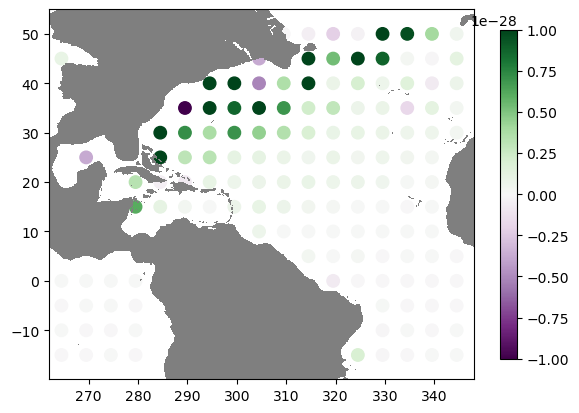

In [21]:
xx, yy = np.meshgrid(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)))

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
# im = ax.pcolormesh(KEflux.XC, KEflux.YC.isel(YC=slice(None,-1)), 
#                    KEflux.isel(YC=slice(None,-1)), cmap='RdBu_r',
#               vmin=-1e-9, vmax=1e-9, rasterized=True
#              )
im = ax.scatter(xx, yy, 
                s=80,
                c=Ensflux.isel(YC=slice(None,-1)), cmap='PRGn',
              vmin=-1e-28, vmax=1e-28, rasterized=True
             )
ax.pcolormesh(dsm.XC, dsm.YC, dsm.maskC.where(dsm.maskC==0.).isel(Z=18),
              vmin=-2, vmax=2, cmap='binary', rasterized=True
             )
ax.set_xlim([dsm.XC.min(), dsm.XC.max()])
ax.set_ylim([dsm.YC.min(), dsm.YC.max()])
ax.set_aspect(True)
cbar = fig.colorbar(im, ax=ax, shrink=.7)
plt.savefig(op.join(spec,'Figs/Ensflux_Z0452_s=%03dkm_%010d.pdf' 
                    % (int(length*1e-3),ntimes[0,0])))